In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
data = pd.read_csv('/content/drive/MyDrive/H4TF 4 CON CÚ/Business Case 2/Data/100000 Sales Records.csv')
data.head()

Region                Country      Item Type  \
0       Middle East and North Africa             Azerbaijan         Snacks   
1  Central America and the Caribbean                 Panama      Cosmetics   
2                 Sub-Saharan Africa  Sao Tome and Principe         Fruits   
3                 Sub-Saharan Africa  Sao Tome and Principe  Personal Care   
4  Central America and the Caribbean                 Belize      Household   

  Sales Channel Order Priority Order Date   Order ID   Ship Date  Units Sold  \
0        Online              C  10/8/2014  535113847  10/23/2014         934   
1       Offline              L  2/22/2015  874708545   2/27/2015        4551   
2       Offline              M  12/9/2015  854349935   1/18/2016        9986   
3        Online              M  9/17/2014  892836844  10/12/2014        9118   
4       Offline              H   2/4/2010  129280602    3/5/2010        5858   

   Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0      152.58      97.44      142509.72    91008.96      51500.76  
1      437.20     263.33     1989697.20  1198414.83     791282.37  
2        9.33       6.92       93169.38    69103.12      24066.26  
3       81.73      56.67      745214.14   516717.06     228497.08  
4      668.27     502.54     3914725.66  2943879.32     970846.34

In [143]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item Type       100000 non-null  object        
 3   Sales Channel   100000 non-null  object        
 4   Order Priority  100000 non-null  object        
 5   Order Date      100000 non-null  datetime64[ns]
 6   Order ID        100000 non-null  int64         
 7   Ship Date       100000 non-null  datetime64[ns]
 8   Units Sold      100000 non-null  int64         
 9   Unit Price      100000 non-null  float64       
 10  Unit Cost       100000 non-null  float64       
 11  Total Revenue   100000 non-null  float64       
 12  Total Cost      100000 non-null  float64       
 13  Total Profit    100000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int

#Distribution of Numerical features

In [145]:
data.describe()

Order Date      Order ID  \
count                         100000  1.000000e+05   
mean   2013-10-15 06:03:35.136000256  5.503956e+08   
min              2010-01-01 00:00:00  1.000089e+08   
25%              2011-11-25 00:00:00  3.260464e+08   
50%              2013-10-15 00:00:00  5.477185e+08   
75%              2015-09-07 00:00:00  7.750785e+08   
max              2017-07-28 00:00:00  9.999965e+08   
std                              NaN  2.593219e+08   

                        Ship Date     Units Sold     Unit Price  \
count                      100000  100000.000000  100000.000000   
mean   2013-11-09 06:55:19.488000    5001.446170     266.703989   
min           2010-01-02 00:00:00       1.000000       9.330000   
25%           2011-12-21 00:00:00    2505.000000     109.280000   
50%           2013-11-09 00:00:00    5007.000000     205.700000   
75%           2015-10-02 00:00:00    7495.250000     437.200000   
max           2017-09-16 00:00:00   10000.000000     668.270000   
std                           NaN    2884.575424     216.940081   

           Unit Cost  Total Revenue    Total Cost  Total Profit  
count  100000.000000   1.000000e+05  1.000000e+05  1.000000e+05  
mean      188.019711   1.336067e+06  9.419755e+05  3.940912e+05  
min         6.920000   1.866000e+01  1.384000e+01  4.820000e+00  
25%        56.670000   2.797533e+05  1.629283e+05  9.590000e+04  
50%       117.110000   7.898916e+05  4.679374e+05  2.836575e+05  
75%       364.690000   1.836490e+06  1.209475e+06  5.683841e+05  
max       524.960000   6.682700e+06  5.249075e+06  1.738700e+06  
std       175.706023   1.471768e+06  1.151828e+06  3.795986e+05

# Distribution of Categorical features

In [146]:
data.describe(include=[object])

Region Country        Item Type Sales Channel  \
count               100000  100000           100000        100000   
unique                   7     185               12             2   
top     Sub-Saharan Africa   Sudan  Office Supplies        Online   
freq                 26019     623             8426         50054   

       Order Priority  
count          100000  
unique              4  
top                 M  
freq            25088

# Checking missing values

In [147]:
missing_values = data.isnull().sum()
print(missing_values)

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


# Checking Outliers

In [148]:
def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    n = len(numerical_cols)
    fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(15, 5 * ((n + 1) // 2)))

    for i, col in enumerate(numerical_cols):
        ax = axes[i // 2, i % 2]
        box = ax.boxplot(df[col], vert=True, patch_artist=True)
        for patch in box['boxes']:
            patch.set_facecolor('#ADD8E6')
        ax.set_title(f'{col}')
        ax.set_ylabel(col)
        ax.set_xlabel('')

    for j in range(n, 2 * ((n + 1) // 2)):
        fig.delaxes(axes[j // 2, j % 2])

    plt.tight_layout()
    plt.show()

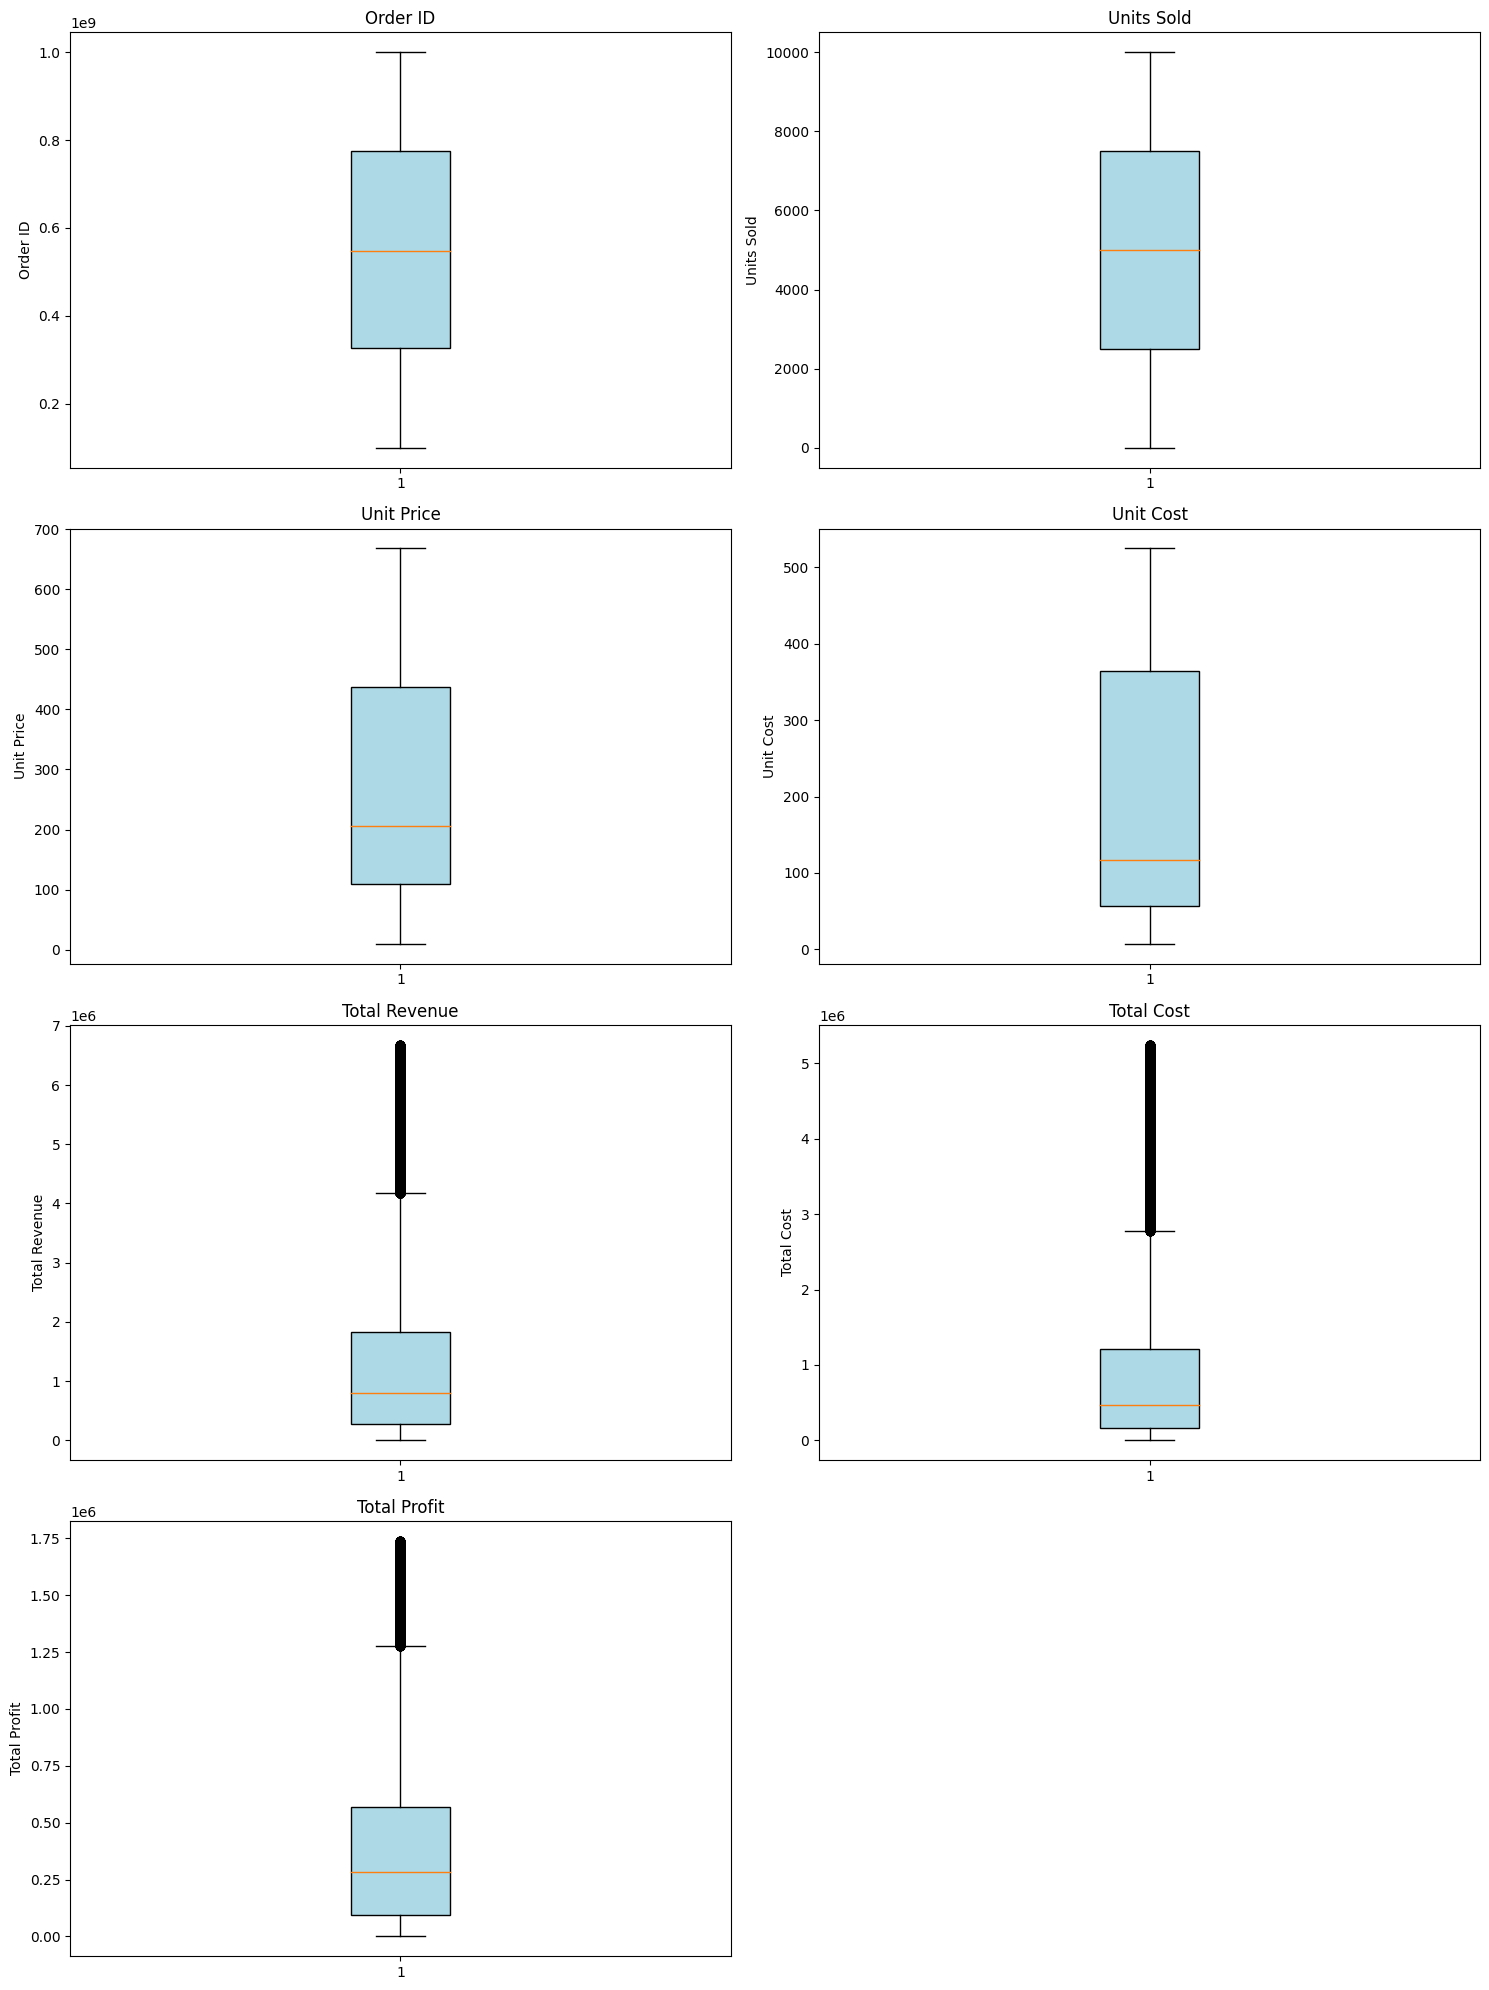

In [149]:
plot_boxplots(data)

# Check duplicate

In [150]:
duplicates = data.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


In [151]:
duplicates = data['Order ID'].duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


# Distribution of features

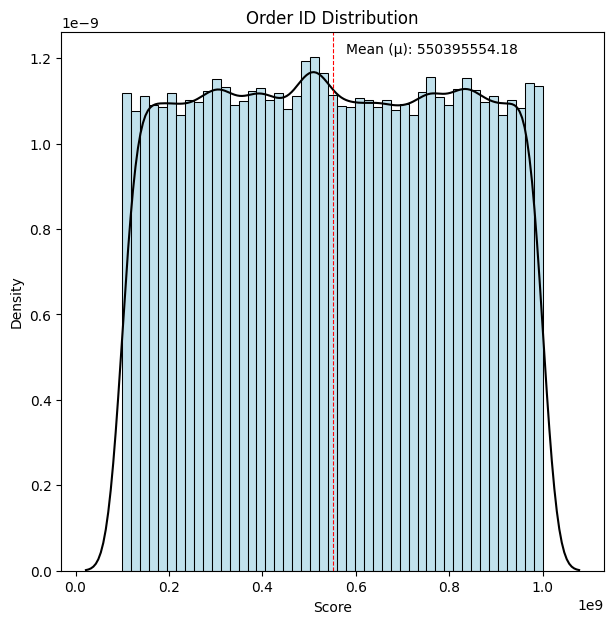

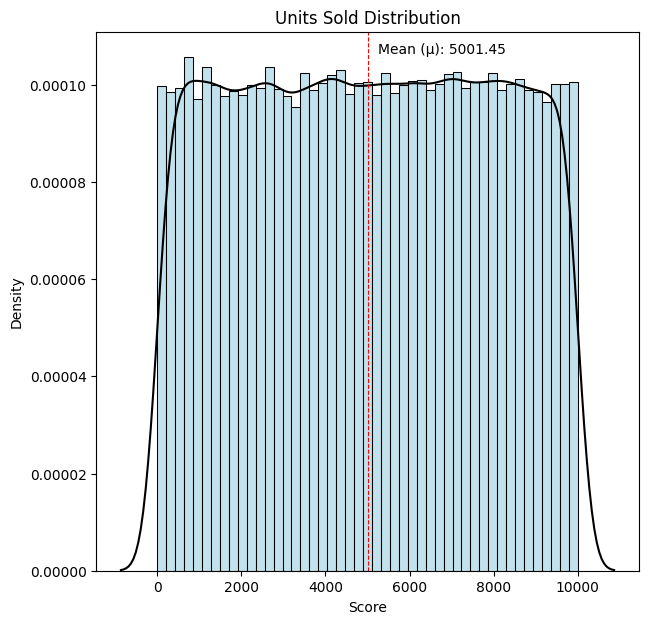

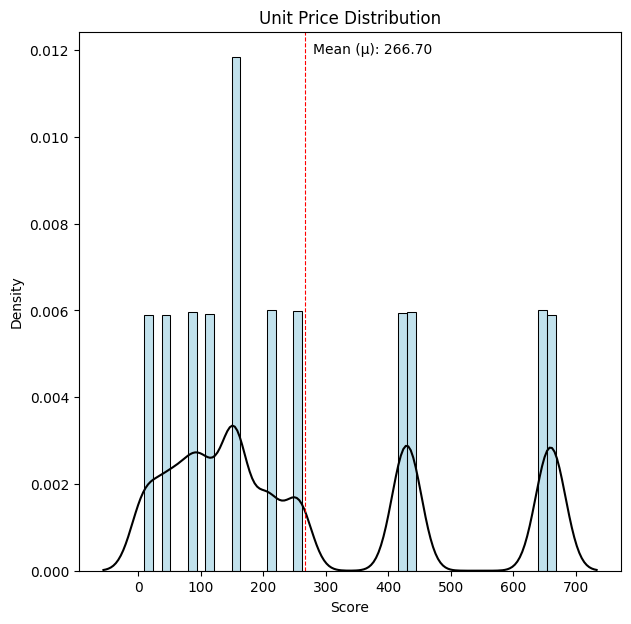

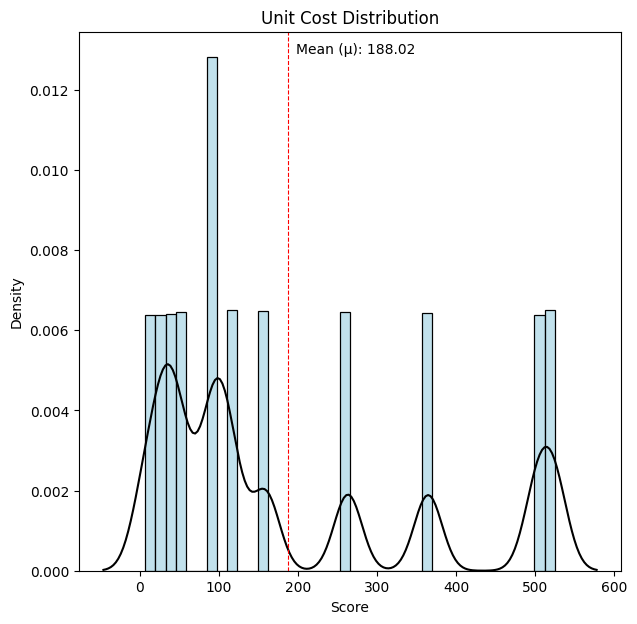

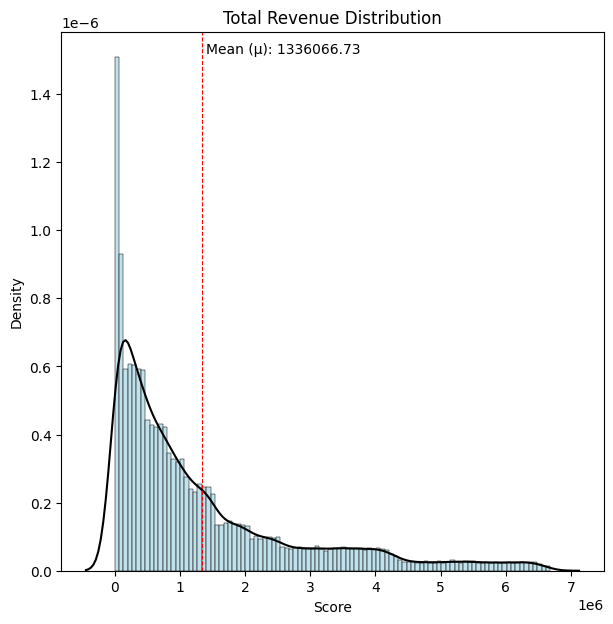

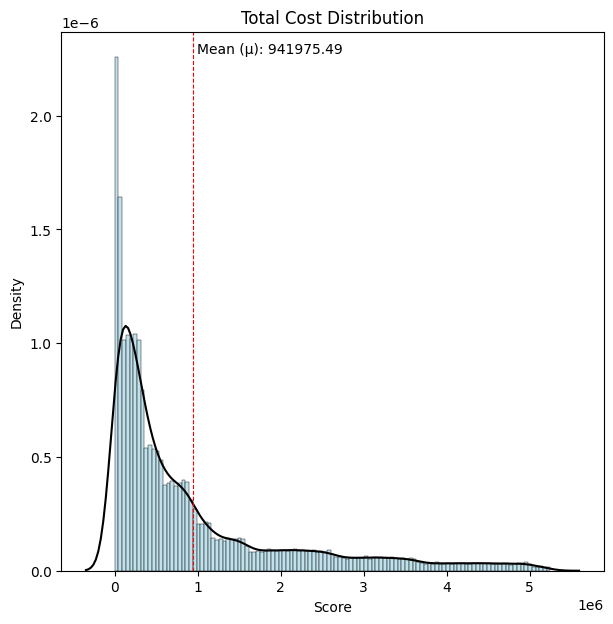

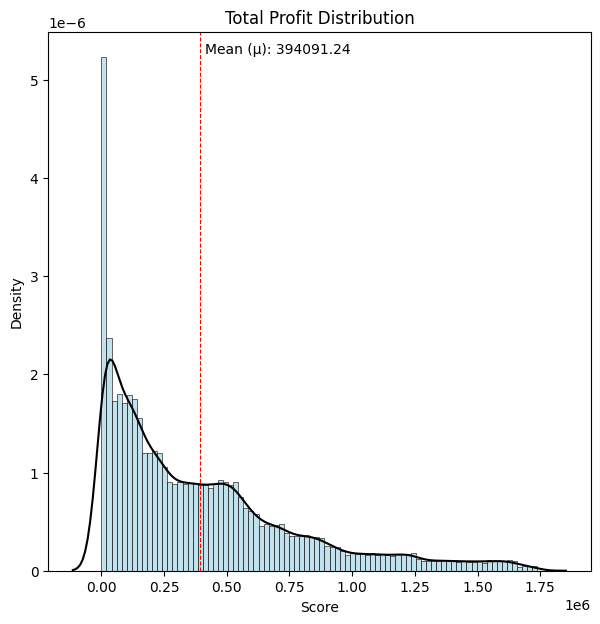

In [152]:
def plot_num_distribution(df):
    for column_name in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(7, 7))
        plt.title("{column_name} Distribution".format(column_name=column_name))

        sns.histplot(df[column_name], stat='density', color='#ADD8E6')

        sns.kdeplot(df[column_name], color='black')

        plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)

        min_ylim, max_ylim = plt.ylim()
        plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))

        plt.xlabel("Score")
        plt.ylabel("Density")

        plt.show()

plot_num_distribution(data)

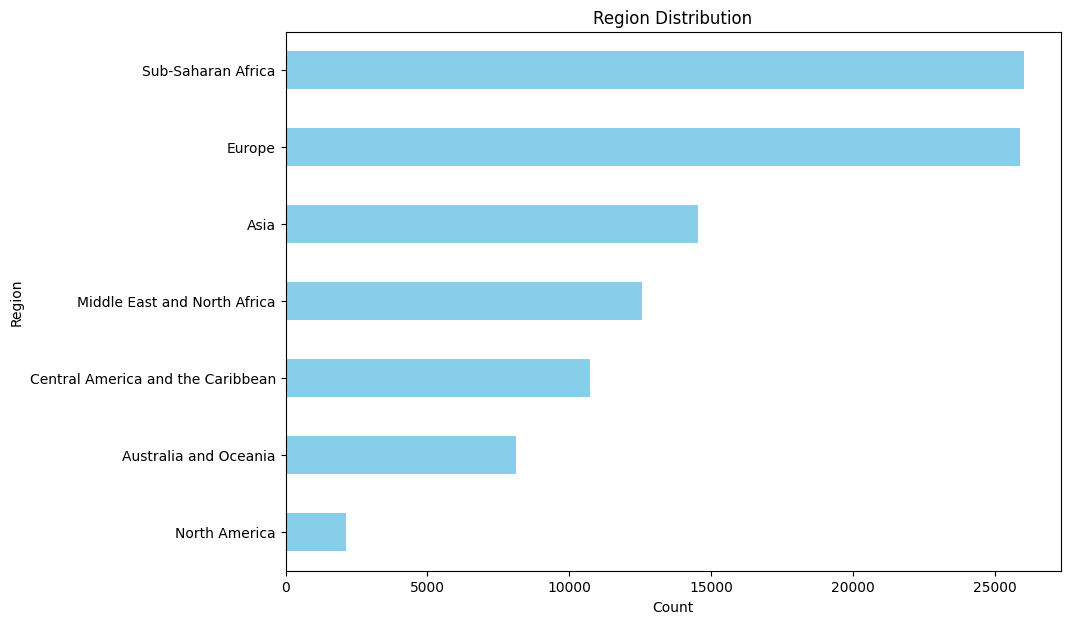

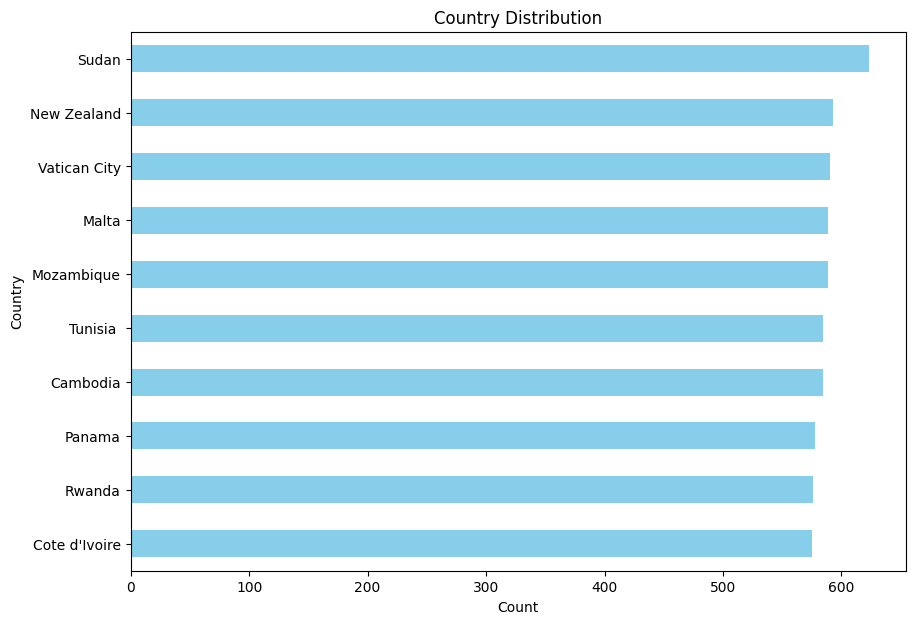

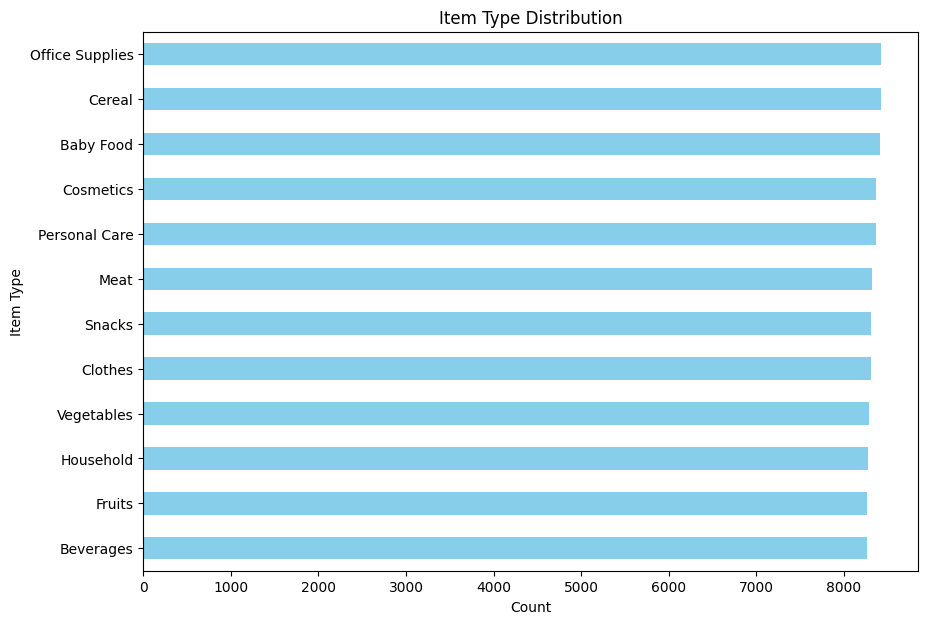

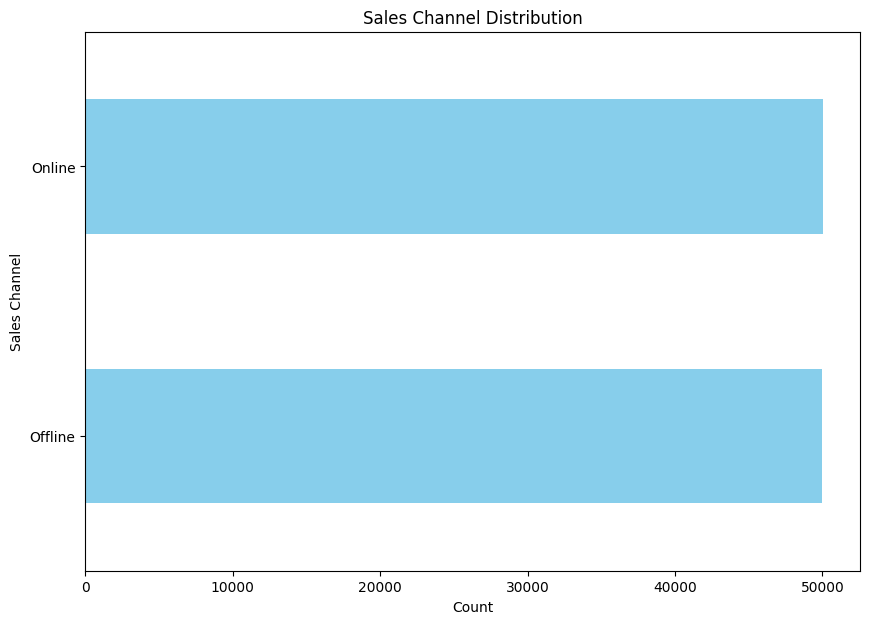

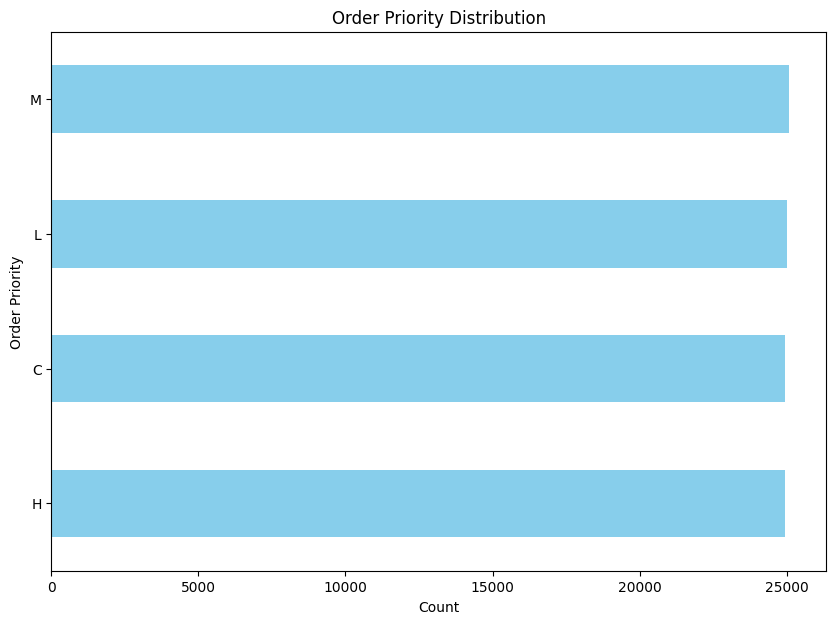

In [80]:
def plot_bar_charts(df):
    object_cols = df.select_dtypes(include=['object']).columns

    for column_name in object_cols:
        plt.figure(figsize=(10, 7))
        value_counts = df[column_name].value_counts().sort_values(ascending=True)

        if len(value_counts) > 20:
            value_counts = value_counts[-10:]

        value_counts.plot(kind='barh', color='skyblue')
        plt.title(f'{column_name} Distribution')
        plt.xlabel('Count')
        plt.ylabel(column_name)
        plt.show()

plot_bar_charts(data)

## **EDA**

# 1. Region and Country

<ipython-input-81-b3dcb358f223>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-81-b3dcb358f223>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




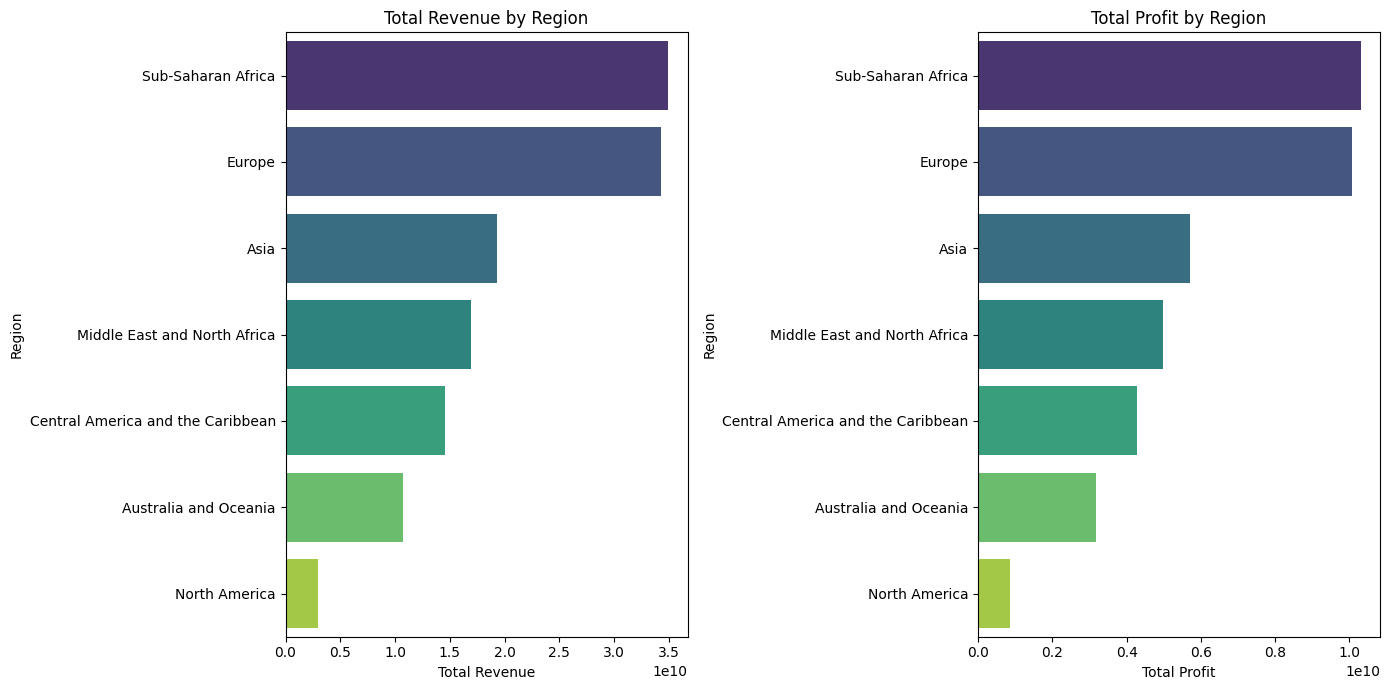

In [81]:
region_revenue = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
region_profit = data.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')

plt.subplot(1, 2, 2)
sns.barplot(x=region_profit.values, y=region_profit.index, palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')

plt.tight_layout();


In [82]:
country_counts = data.groupby('Country').size().reset_index(name='Country_Count')

In [83]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import plot

# Create the choropleth
df= country_counts
data2 = dict(
    type='choropleth',
    locations=df['Country'],
    locationmode='country names',
    z=df['Country_Count'],
    text=df['Country'],
    colorbar={'title': 'Order nb.'},
    colorscale=[
        [0, 'rgb(224,255,255)'],
        [0.01, 'rgb(166,206,227)'],
        [0.02, 'rgb(31,120,180)'],
        [0.03, 'rgb(178,223,138)'],
        [0.05, 'rgb(51,160,44)'],
        [0.10, 'rgb(251,154,153)'],
        [0.20, 'rgb(255,255,0)'],
        [1, 'rgb(227,26,28)']
    ],
    reversescale=False
)

layout = dict(
    title='Number of orders per country',
    geo=dict(
        showframe=True,
        projection={'type': 'mercator'}
    )
)

choromap = go.Figure(data=[data2], layout=layout)

# Use plotly.offline.plot() to display the plot in a browser
plot(choromap, validate=False)


'temp-plot.html'

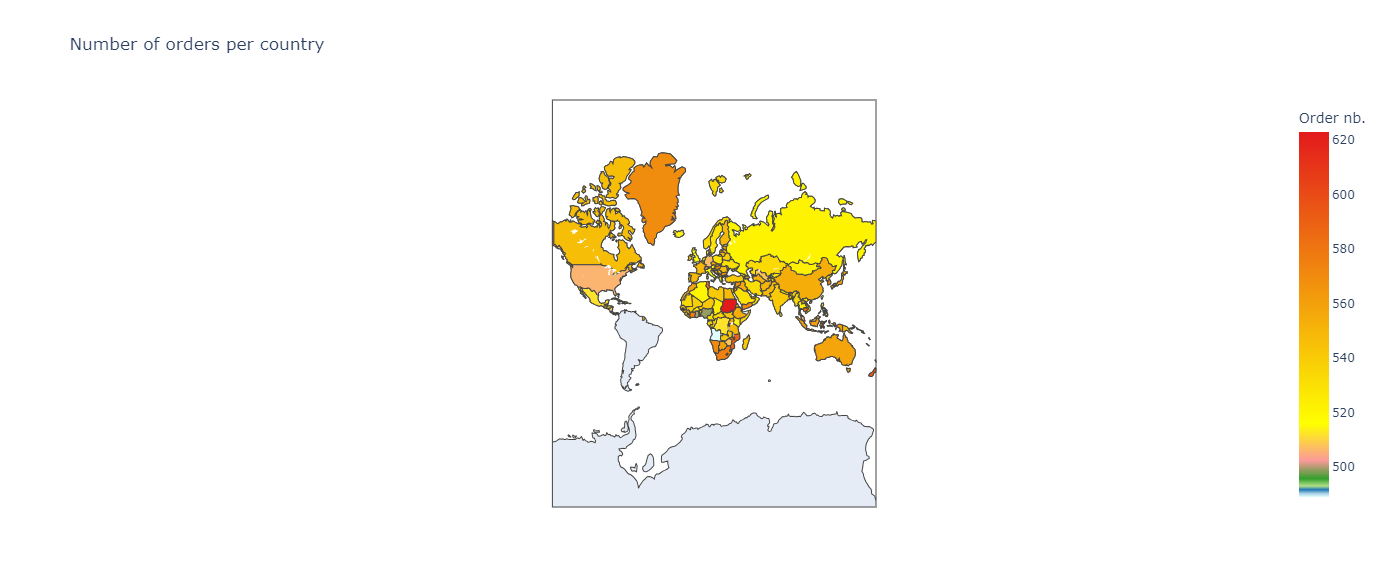

<ipython-input-84-67f040761861>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-84-67f040761861>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




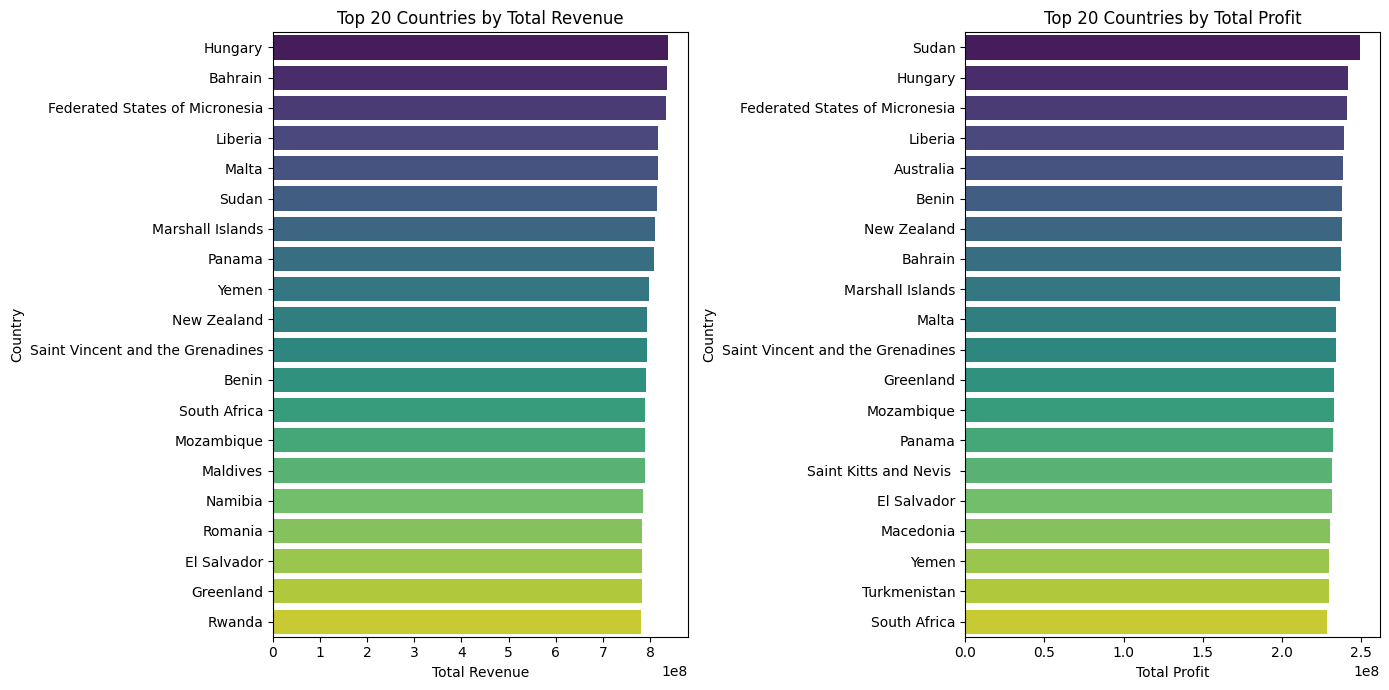

In [84]:
country_revenue = data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(20)
country_profit = data.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='viridis')
plt.title('Top 20 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x=country_profit.values, y=country_profit.index, palette='viridis')
plt.title('Top 20 Countries by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


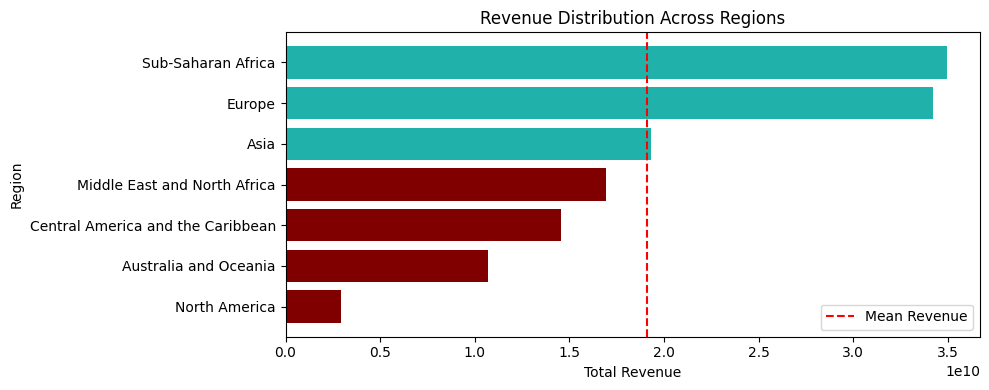

In [85]:
def plot_total_revenue_accross(df):
    # Group the data by region and calculate the total revenue for each region
    revenue_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()

    # Sort the data by total revenue in ascending order
    revenue_by_region = revenue_by_region.sort_values(by='Total Revenue')

    # Calculate the mean total revenue across all regions
    mean_revenue = revenue_by_region['Total Revenue'].mean()

    # Create a horizontal bar plot of the revenue distribution, highlighting the bars above the mean
    plt.figure(figsize=(10, 4))
    for i, row in revenue_by_region.iterrows():
        if row['Total Revenue'] > mean_revenue:
            color = 'lightseagreen'  # Use a different color for bars above the mean
        else:
            color = 'maroon'  # Use a default color for bars below the mean
        plt.barh(row['Region'], row['Total Revenue'], color=color)

    plt.title('Revenue Distribution Across Regions')
    plt.xlabel('Total Revenue')
    plt.ylabel('Region')
    plt.axvline(x=mean_revenue, color='r', linestyle='--', label='Mean Revenue')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_total_revenue_accross(data)

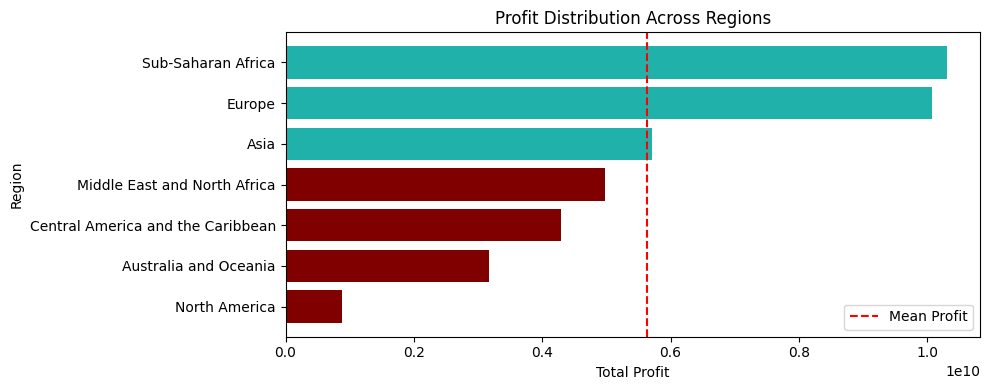

In [86]:
def plot_total_profit_accross(df):
    # Group the data by region and calculate the total profit for each region
    profit_by_region = df.groupby('Region')['Total Profit'].sum().reset_index()

    # Sort the data by total profit in ascending order
    profit_by_region = profit_by_region.sort_values(by='Total Profit')

    # Calculate the mean total profit across all regions
    mean_profit = profit_by_region['Total Profit'].mean()

    # Create a horizontal bar plot of the profit distribution, highlighting the bars above the mean
    plt.figure(figsize=(10, 4))
    for i, row in profit_by_region.iterrows():
        if row['Total Profit'] > mean_profit:
            color = 'lightseagreen'  # Use a different color for bars above the mean
        else:
            color = 'maroon'  # Use a default color for bars below the mean
        plt.barh(row['Region'], row['Total Profit'], color=color)

    plt.title('Profit Distribution Across Regions')
    plt.xlabel('Total Profit')
    plt.ylabel('Region')
    plt.axvline(x=mean_profit, color='r', linestyle='--', label='Mean Profit')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_total_profit_accross(data)

RFM analysis

In [87]:
# Define a reference date (last date in the dataset)
reference_date = data['Order Date'].max()

# Calculate Recency, Frequency, and Monetary value for each Country
rfm_data = data.groupby(['Region', 'Country']).agg({
    'Order ID': 'nunique',  # Frequency
    'Total Revenue': 'sum',  # Monetary
    'Order Date': lambda x: (reference_date - x.max()).days  # Recency
}).reset_index()

# Rename columns for clarity
rfm_data.columns = ['Region', 'Country', 'Frequency', 'Monetary', 'Recency']

# Assign scores for each metric
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 3, labels=[3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 3, labels=[1, 2, 3])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 3, labels=[1, 2, 3])

# Calculate RFM Score
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

rfm_data

Region     Country  Frequency      Monetary  Recency R_Score  \
0                  Asia  Bangladesh        545  7.478366e+08        2       3   
1                  Asia      Bhutan        534  7.406026e+08        1       3   
2                  Asia      Brunei        558  7.088187e+08        0       3   
3                  Asia    Cambodia        584  7.547086e+08        4       2   
4                  Asia       China        554  7.143825e+08       13       1   
..                  ...         ...        ...           ...      ...     ...   
180  Sub-Saharan Africa  The Gambia        513  6.834571e+08       14       1   
181  Sub-Saharan Africa        Togo        523  6.918882e+08        0       3   
182  Sub-Saharan Africa      Uganda        554  7.478533e+08        2       3   
183  Sub-Saharan Africa      Zambia        541  7.218788e+08        3       2   
184  Sub-Saharan Africa    Zimbabwe        508  7.220924e+08        7       1   

    F_Score M_Score RFM_Score  
0         2       3       323  
1         2       2       322  
2         3       2       332  
3         3       3       233  
4         3       2       132  
..      ...     ...       ...  
180       1       1       111  
181       1       1       311  
182       3       3       333  
183       2       2       222  
184       1       2       112  

[185 rows x 9 columns]

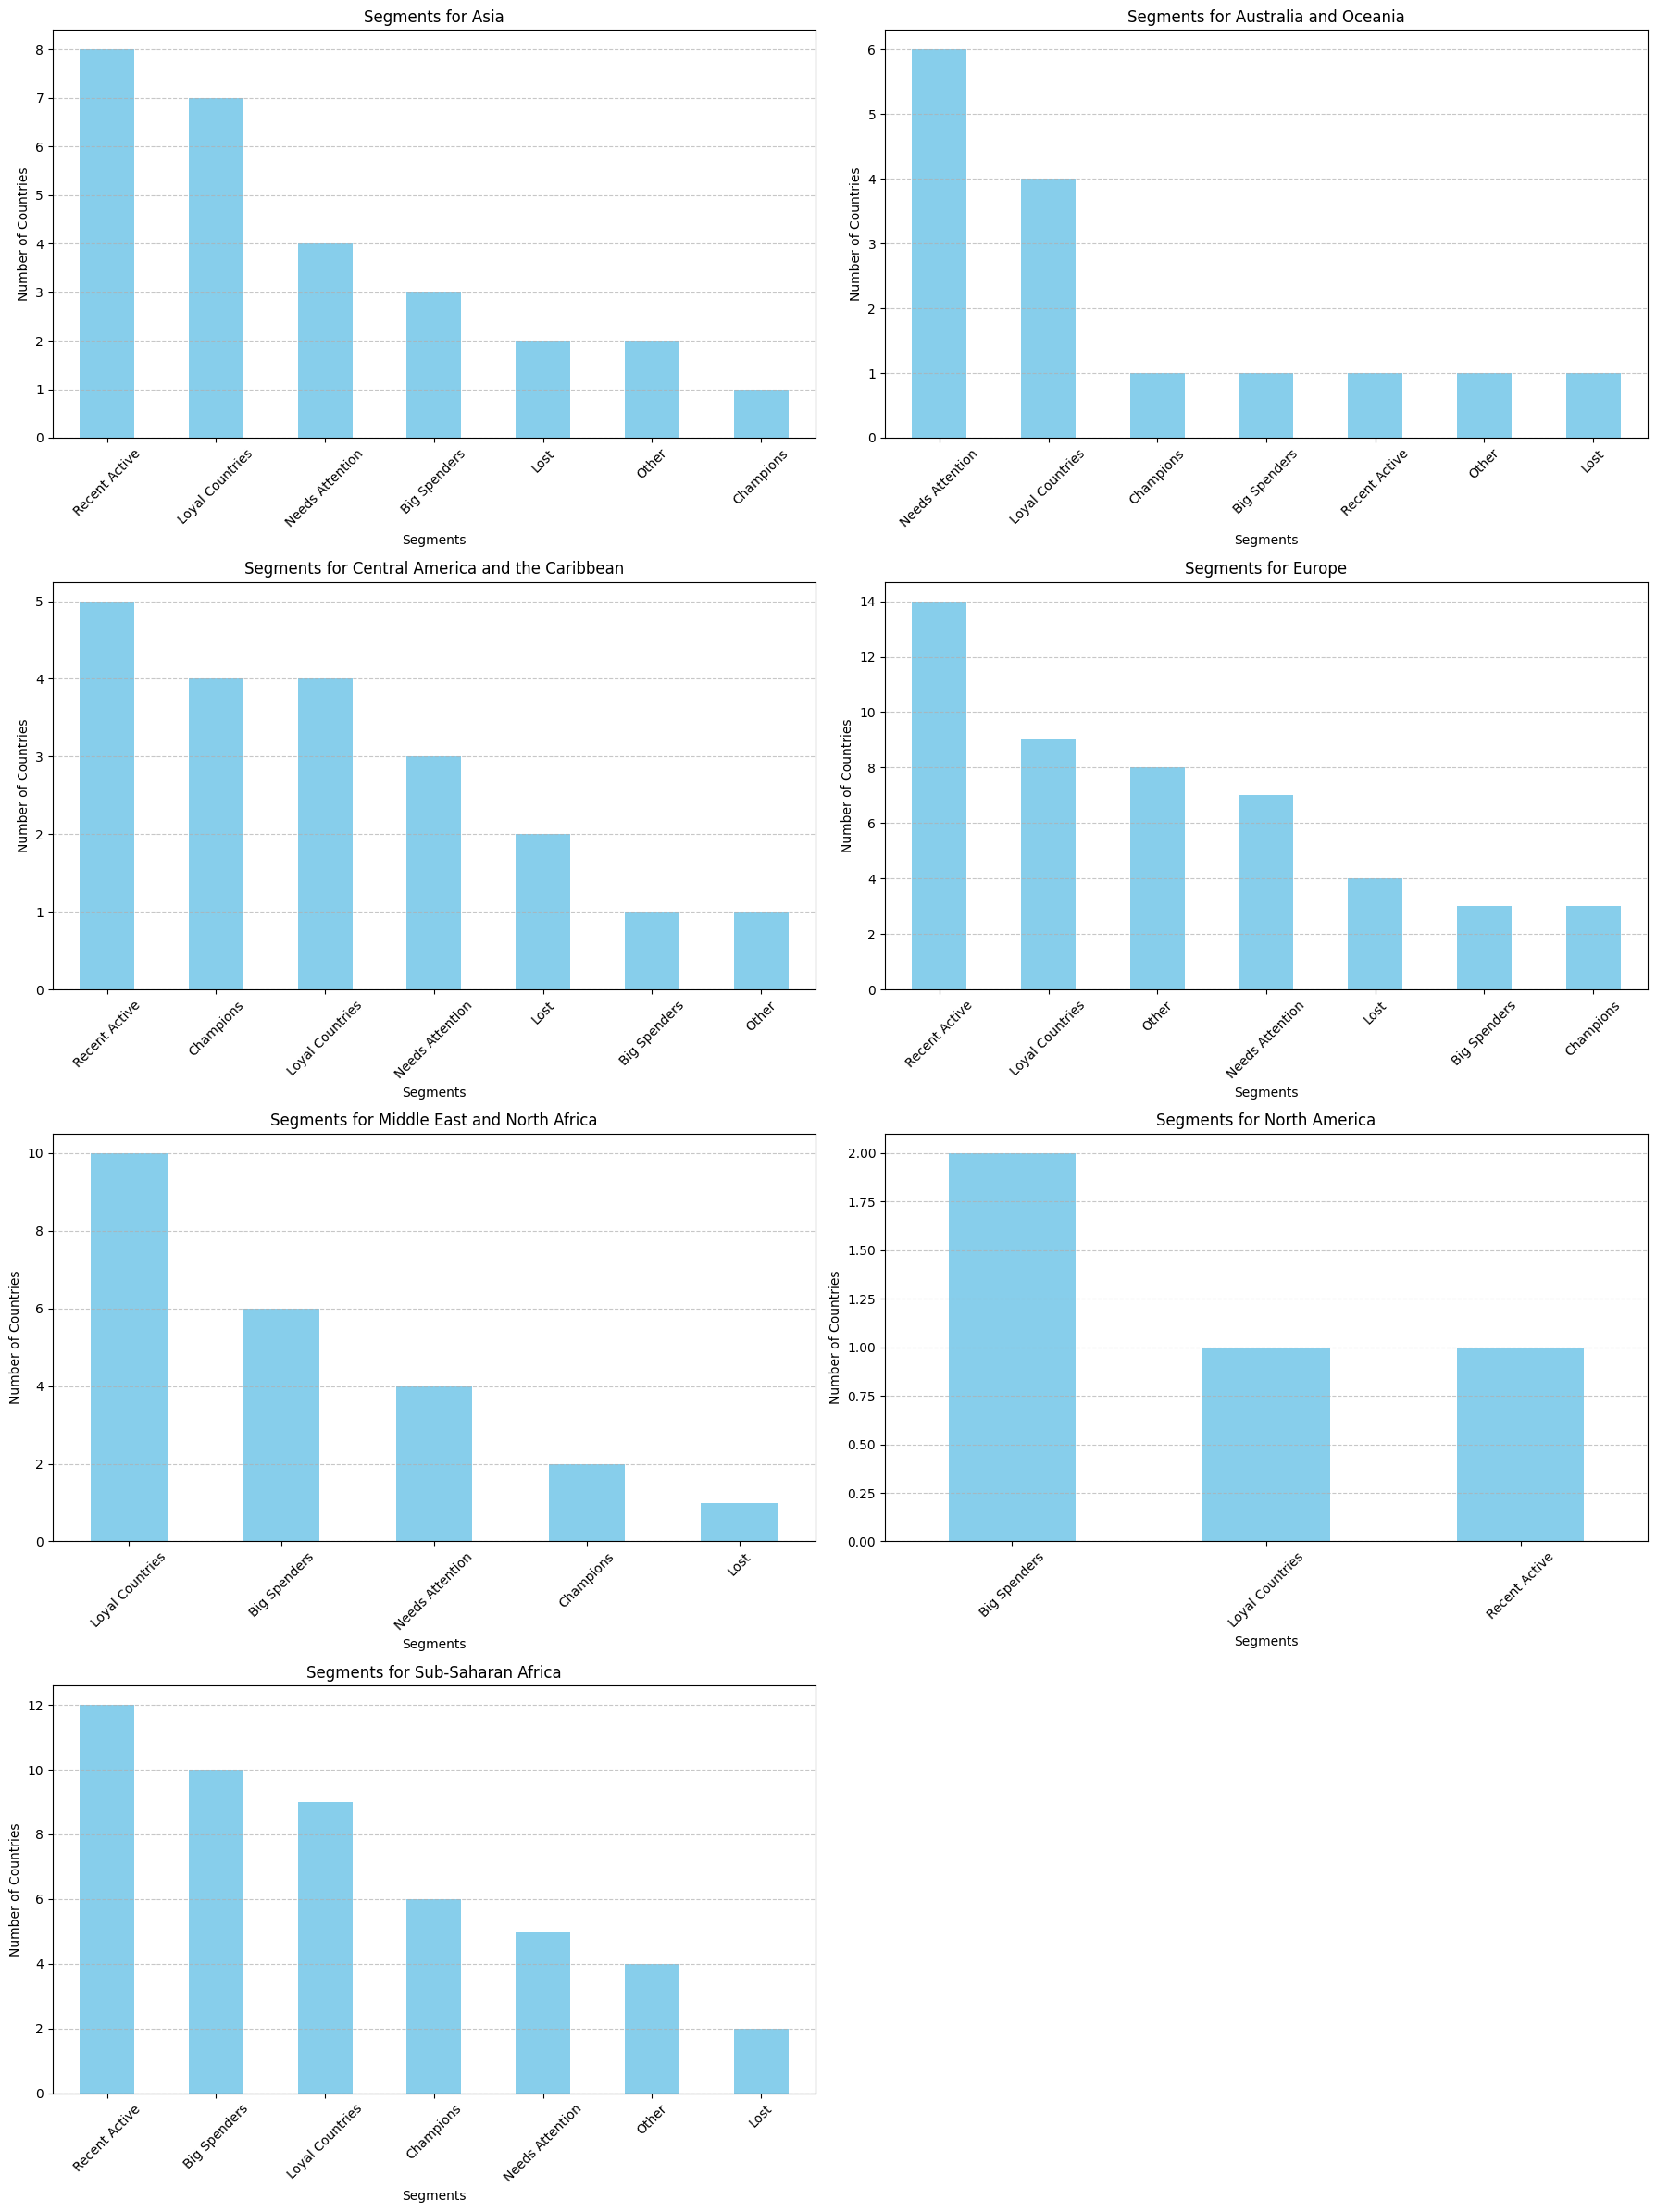

In [88]:
# Define refined segments based on RFM Score for countries
def refined_segment_rfm_country(row):
    if row['RFM_Score'] == '333':
        return 'Champions'
    elif row['F_Score'] == 3:
        return 'Loyal Countries'
    elif row['M_Score'] == 3:
        return 'Big Spenders'
    elif row['R_Score'] == 3:
        return 'Recent Active'
    elif row['R_Score'] == 3 and row['F_Score'] == 3:
        return 'Potential Loyalists'
    elif row['R_Score'] == 3 and row['F_Score'] < 3 and row['M_Score'] < 3:
        return 'Promising'
    elif row['R_Score'] == 2 and (row['F_Score'] < 3 or row['M_Score'] < 3):
        return 'Needs Attention'
    elif row['R_Score'] == 1 and (row['F_Score'] == 3 or row['M_Score'] == 3):
        return 'At Risk'
    elif row['R_Score'] == 1 and row['F_Score'] == 1 and row['M_Score'] == 1:
        return 'Lost'
    else:
        return 'Other'

rfm_data['Segment'] = rfm_data.apply(refined_segment_rfm_country, axis=1)

regions = rfm_data['Region'].unique()
# Plot the refined segments for each region with 2 plots in each axis
num_plots_per_row = 2
num_rows = (len(regions) + 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(18, 6 * num_rows))

for i, region in enumerate(regions):
    row, col = divmod(i, num_plots_per_row)
    region_data = rfm_data[rfm_data['Region'] == region]
    segment_counts = region_data['Segment'].value_counts()

    segment_counts.plot(kind='bar', color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Segments for {region}')
    axes[row, col].set_xlabel('Segments')
    axes[row, col].set_ylabel('Number of Countries')
    axes[row, col].set_xticks(range(len(segment_counts)))
    axes[row, col].set_xticklabels(segment_counts.index, rotation=45)
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots
if len(regions) % num_plots_per_row != 0:
    for j in range(len(regions) % num_plots_per_row, num_plots_per_row):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()


CLV Analysis

In [89]:
# Calculate Total Revenue per customer (Country used as a proxy for customers here)
customer_revenue = data.groupby('Country').agg({
    'Total Revenue': 'sum',
    'Order ID': 'nunique',  # Frequency
    'Order Date': [lambda x: (x.max() - x.min()).days, 'count']
}).reset_index()

customer_revenue.columns = ['Country', 'Total Revenue', 'Frequency', 'Customer Lifespan', 'Num Orders']

# Average Order Value (AOV)
customer_revenue['AOV'] = customer_revenue['Total Revenue'] / customer_revenue['Num Orders']

# Purchase Frequency (PF)
total_orders = customer_revenue['Num Orders'].sum()
total_customers = customer_revenue['Country'].nunique()
customer_revenue['PF'] = customer_revenue['Num Orders'] / total_customers

# Customer Value (CV)
customer_revenue['CV'] = customer_revenue['AOV'] * customer_revenue['PF']

# Average Customer Lifespan (ACL)
customer_revenue['ACL'] = customer_revenue['Customer Lifespan'] / total_customers

# Customer Lifetime Value (CLV)
customer_revenue['CLV'] = customer_revenue['CV'] * customer_revenue['ACL']

# Display the results
customer_revenue[['Country', 'CLV']].sort_values(by='CLV', ascending=False).head(10)


Country           CLV
10                            Bahrain  6.733677e+07
50     Federated States of Micronesia  6.714881e+07
66                            Hungary  6.692131e+07
88                            Liberia  6.593958e+07
99                              Malta  6.577992e+07
155                             Sudan  6.572636e+07
100                  Marshall Islands  6.508050e+07
124                            Panama  6.494082e+07
182                             Yemen  6.421136e+07
136  Saint Vincent and the Grenadines  6.393804e+07

# 2. Item Type

<ipython-input-90-1d8c83b99b0a>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-90-1d8c83b99b0a>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




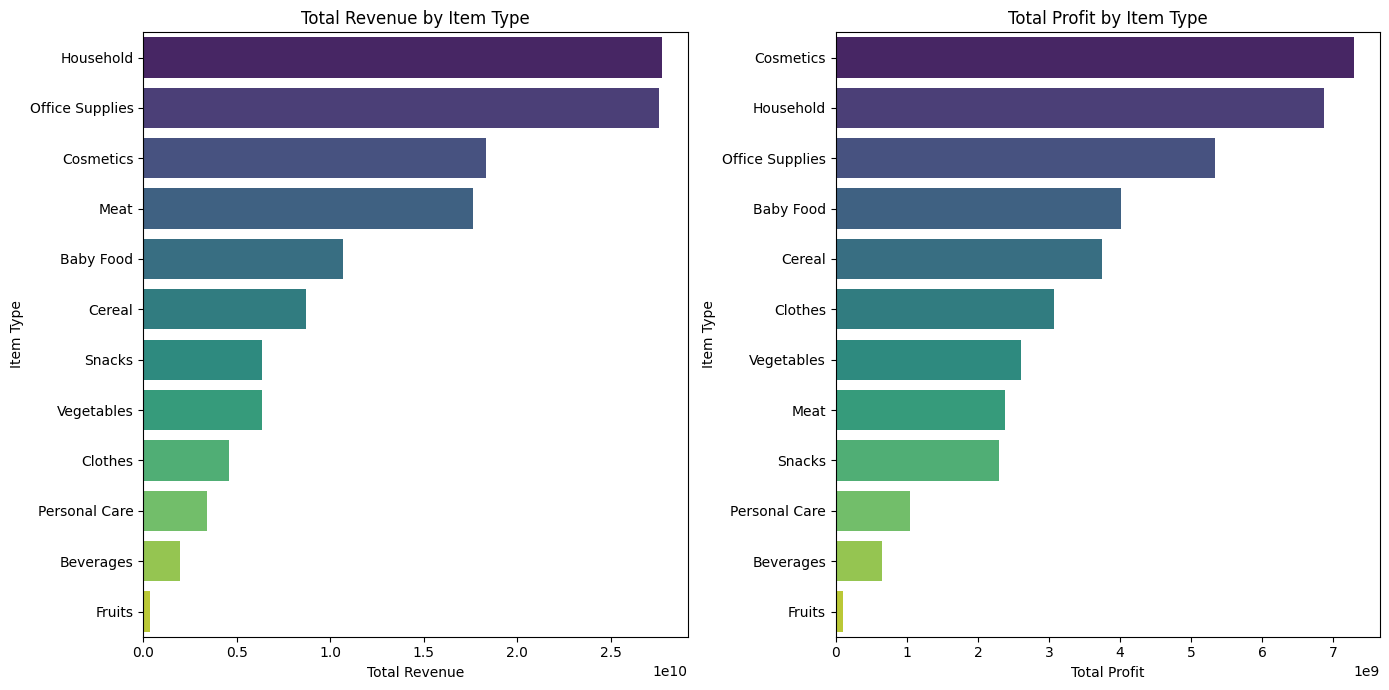

In [90]:
item_type_revenue = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)

item_type_profit = data.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=item_type_revenue.values, y=item_type_revenue.index, palette='viridis')
plt.title('Total Revenue by Item Type')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')

plt.subplot(1, 2, 2)
sns.barplot(x=item_type_profit.values, y=item_type_profit.index, palette='viridis')
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')

plt.tight_layout()
plt.show()

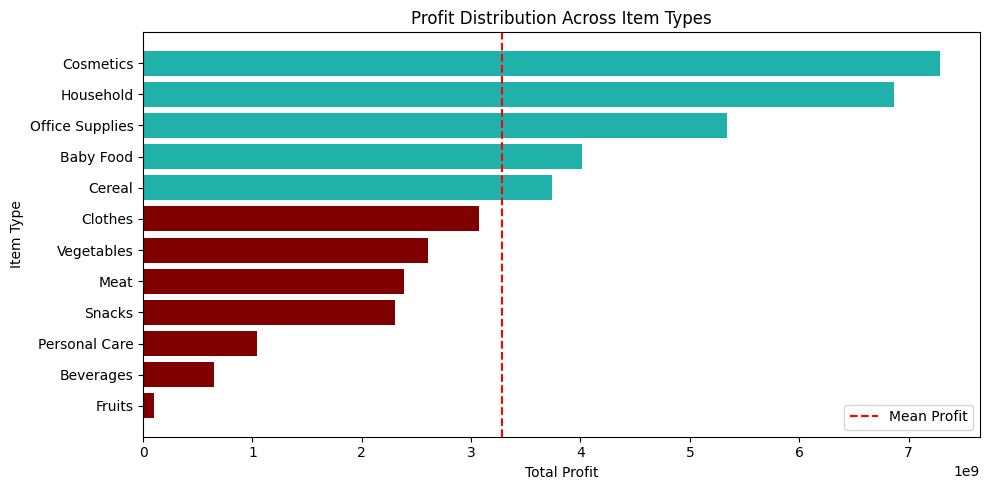

In [91]:
df = data
# Group the data by item type and calculate the total profit for each item type
profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum().reset_index()

# Sort the data by total profit in ascending order
profit_by_item_type = profit_by_item_type.sort_values(by='Total Profit')

# Calculate the mean total profit across all item types
mean_profit = profit_by_item_type['Total Profit'].mean()

# Create a horizontal bar plot of the profit distribution, highlighting the bars above the mean
plt.figure(figsize=(10, 5))
for i, row in profit_by_item_type.iterrows():
    if row['Total Profit'] > mean_profit:
        color = 'lightseagreen'  # Use a different color for bars above the mean
    else:
        color = 'maroon'  # Use a default color for bars below the mean
    plt.barh(row['Item Type'], row['Total Profit'], color=color)

# Create a horizontal bar plot of the profit distribution
plt.title('Profit Distribution Across Item Types')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.axvline(x=mean_profit, color='r', linestyle='--', label='Mean Profit')
plt.legend()
plt.tight_layout()
plt.show()

ABC-XYZ Analysis


In [92]:
# Aggregate Total Revenue by Item Type
abc_data = data.groupby('Item Type').agg({
    'Total Revenue': 'sum'
}).reset_index()

# Sort by Total Revenue
abc_data = abc_data.sort_values(by='Total Revenue', ascending=False)

# Calculate cumulative percentage
abc_data['Cumulative Revenue'] = abc_data['Total Revenue'].cumsum()
abc_data['Cumulative Percentage'] = 100 * abc_data['Cumulative Revenue'] / abc_data['Total Revenue'].sum()

# Classify into A, B, C categories
def classify_abc(percentage):
    if percentage <= 80:
        return 'A'
    elif percentage <= 95:
        return 'B'
    else:
        return 'C'

abc_data['ABC Category'] = abc_data['Cumulative Percentage'].apply(classify_abc)

abc_data


Item Type  Total Revenue  Cumulative Revenue  Cumulative Percentage  \
6         Household   2.770567e+10        2.770567e+10              20.736740   
8   Office Supplies   2.754184e+10        5.524751e+10              41.350860   
4         Cosmetics   1.832938e+10        7.357688e+10              55.069767   
7              Meat   1.761195e+10        9.118884e+10              68.251708   
0         Baby Food   1.069920e+10        1.018880e+11              76.259690   
2            Cereal   8.691734e+09        1.105798e+11              82.765154   
10           Snacks   6.362447e+09        1.169422e+11              87.527227   
11       Vegetables   6.355720e+09        1.232979e+11              92.284265   
3           Clothes   4.565002e+09        1.278629e+11              95.701012   
9     Personal Care   3.393247e+09        1.312562e+11              98.240741   
1         Beverages   1.969849e+09        1.332260e+11              99.715105   
5            Fruits   3.806386e+08        1.336067e+11             100.000000   

   ABC Category  
6             A  
8             A  
4             A  
7             A  
0             A  
2             B  
10            B  
11            B  
3             C  
9             C  
1             C  
5             C

In [93]:
import numpy as np

# Calculate Variability of Demand
xyz_data = data.groupby('Item Type').agg({
    'Units Sold': ['mean', 'std']
}).reset_index()

xyz_data.columns = ['Item Type', 'Mean Units Sold', 'Std Units Sold']
xyz_data['Coefficient of Variation'] = xyz_data['Std Units Sold'] / xyz_data['Mean Units Sold']

# Classify into X, Y, Z categories
def classify_xyz(cv):
    if cv <= 0.5:
        return 'X'
    elif cv <= 1:
        return 'Y'
    else:
        return 'Z'

xyz_data['XYZ Category'] = xyz_data['Coefficient of Variation'].apply(classify_xyz)

xyz_data


Item Type  Mean Units Sold  Std Units Sold  \
0         Baby Food      4985.324135     2909.988684   
1         Beverages      5027.151005     2879.487420   
2            Cereal      5017.743498     2892.184544   
3           Clothes      5030.520231     2899.931089   
4         Cosmetics      5008.896535     2886.110853   
5            Fruits      4937.941903     2855.846363   
6         Household      5008.310582     2886.538120   
7              Meat      5017.471995     2874.568748   
8   Office Supplies      5019.384049     2876.307323   
9     Personal Care      4963.864897     2896.037304   
10           Snacks      5019.149254     2871.797816   
11       Vegetables      4981.264912     2885.550378   

    Coefficient of Variation XYZ Category  
0                   0.583711            Y  
1                   0.572787            Y  
2                   0.576391            Y  
3                   0.576467            Y  
4                   0.576197            Y  
5                   0.578348            Y  
6                   0.576350            Y  
7                   0.572912            Y  
8                   0.573040            Y  
9                   0.583424            Y  
10                  0.572168            Y  
11                  0.579281            Y

In [94]:
abc_xyz_data = abc_data[['Item Type', 'ABC Category']].merge(xyz_data[['Item Type', 'XYZ Category']], on='Item Type')
abc_xyz_data

Item Type ABC Category XYZ Category
0         Household            A            Y
1   Office Supplies            A            Y
2         Cosmetics            A            Y
3              Meat            A            Y
4         Baby Food            A            Y
5            Cereal            B            Y
6            Snacks            B            Y
7        Vegetables            B            Y
8           Clothes            C            Y
9     Personal Care            C            Y
10        Beverages            C            Y
11           Fruits            C            Y

# Region and Country + Item type

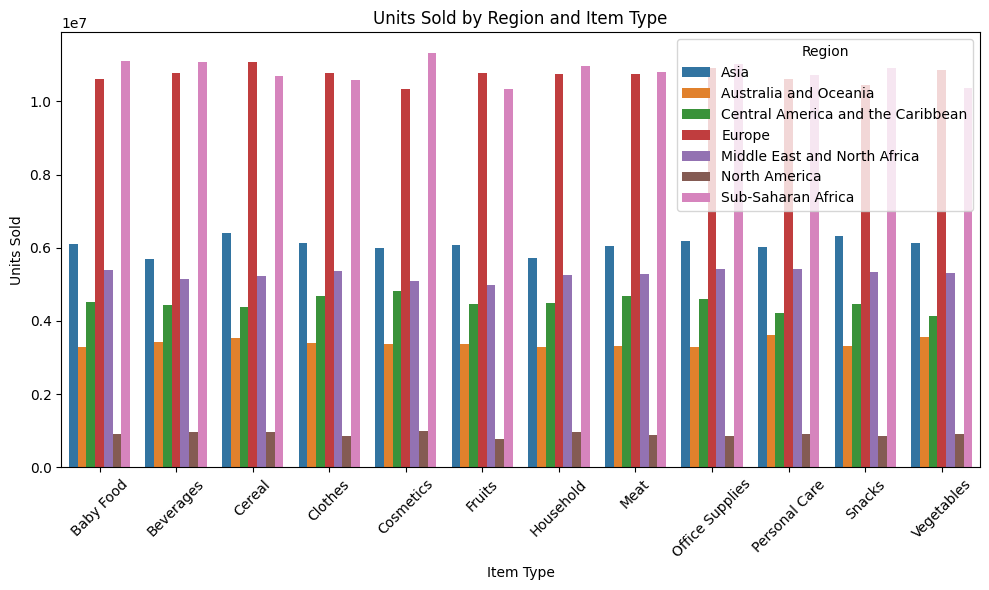

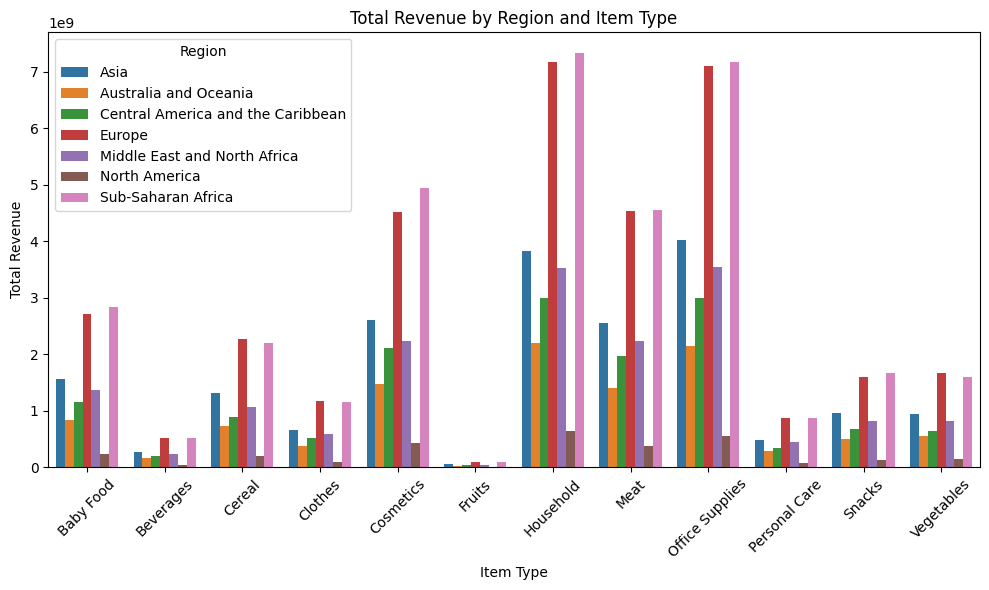

In [95]:
priority_metrics = data.groupby(['Region', 'Item Type']).agg({
        'Units Sold': 'sum',
        'Total Revenue': 'sum',
        'Total Profit': 'sum',
    }).reset_index()

df = priority_metrics
# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Units Sold', hue='Region', data=df)
plt.title('Units Sold by Region and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Total Revenue', hue='Region', data=df)
plt.title('Total Revenue by Region and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# 3. Sales Channel

<ipython-input-96-bc85c33e2b9b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-96-bc85c33e2b9b>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




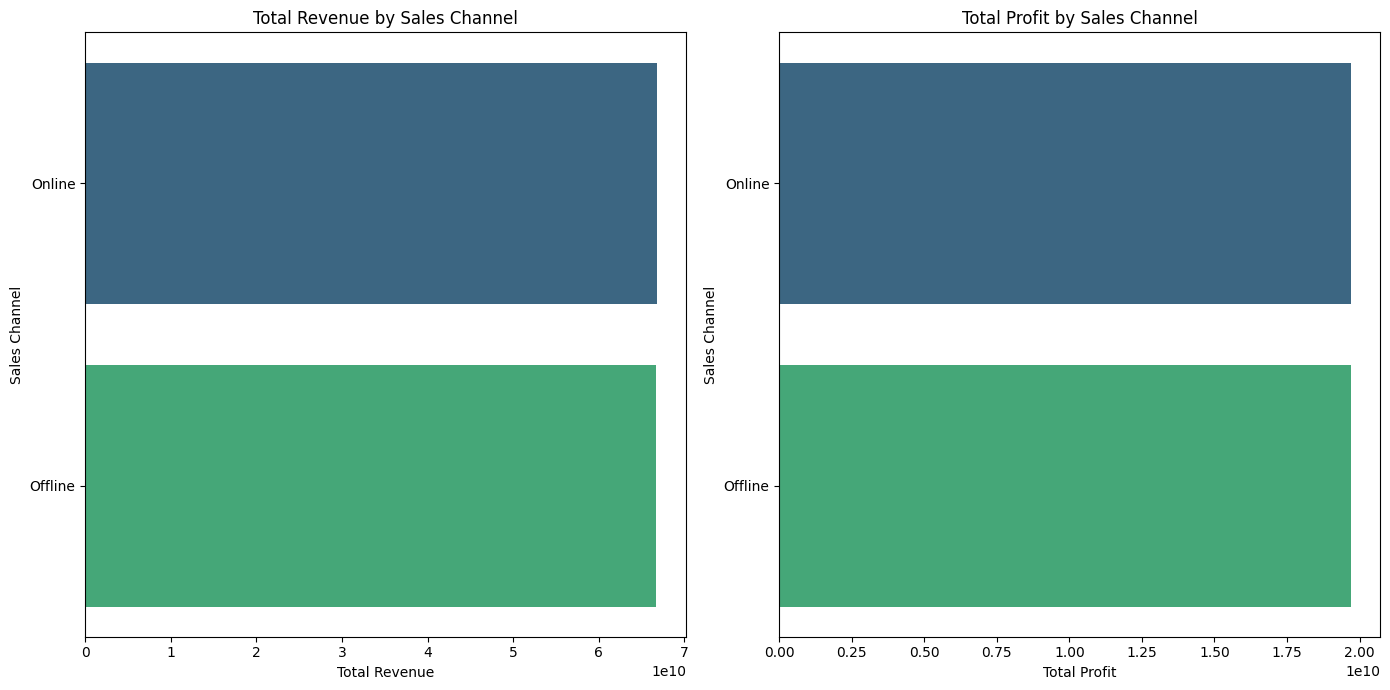

In [96]:
sales_channel_revenue = data.groupby('Sales Channel')['Total Revenue'].sum().sort_values(ascending=False)
sales_channel_profit = data.groupby('Sales Channel')['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=sales_channel_revenue.values, y=sales_channel_revenue.index, palette='viridis')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Total Revenue')

plt.subplot(1, 2, 2)
sns.barplot(x=sales_channel_profit.values, y=sales_channel_profit.index, palette='viridis')
plt.title('Total Profit by Sales Channel')
plt.xlabel('Total Profit')

plt.tight_layout()
plt.show()


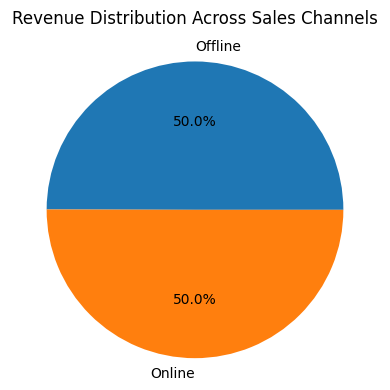

In [97]:
df = data
# Group the data by sales channel and calculate the total revenue for each sales channel
revenue_by_sales_channel = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()

# Create a pie chart of the revenue distribution
plt.figure(figsize=(4, 4))
plt.title('Revenue Distribution Across Sales Channels', y=1.05)
plt.pie(revenue_by_sales_channel['Total Revenue'], labels=revenue_by_sales_channel['Sales Channel'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.axis('equal')
plt.tight_layout()
plt.show()

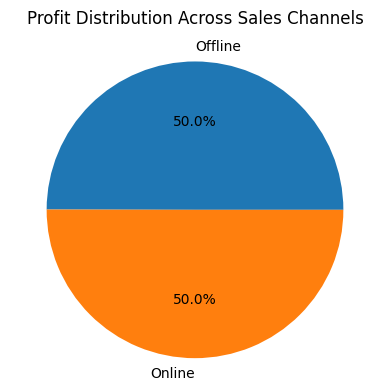

In [98]:
# Group the data by sales channel and calculate the total profit for each sales channel
profit_by_sales_channel = df.groupby('Sales Channel')['Total Profit'].sum().reset_index()

# Create a pie chart of the profit distribution
plt.figure(figsize=(4, 4))
plt.title('Profit Distribution Across Sales Channels', y=1.05)
plt.pie(profit_by_sales_channel['Total Profit'], labels=profit_by_sales_channel['Sales Channel'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4. Order Priority

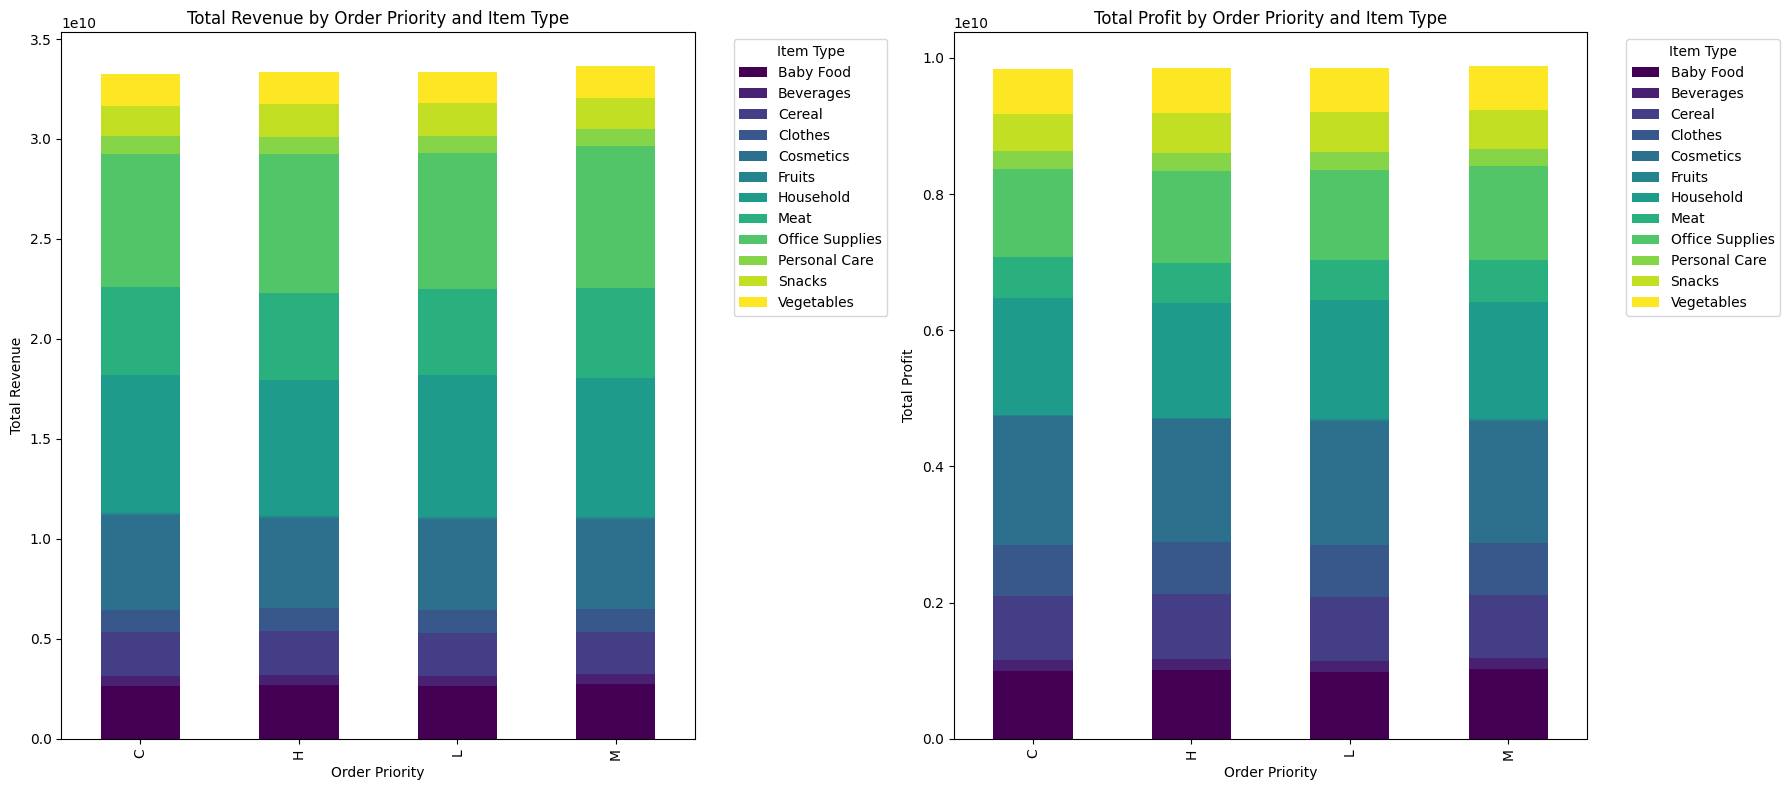

In [99]:
# Group by 'Order Priority' and 'Item Type' and sum the 'Total Revenue' and 'Total Profit'
order_priority_item_revenue = data.groupby(['Order Priority', 'Item Type'])['Total Revenue'].sum().unstack().fillna(0)
order_priority_item_profit = data.groupby(['Order Priority', 'Item Type'])['Total Profit'].sum().unstack().fillna(0)

# Plotting the Total Revenue by Order Priority and Item Type
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
order_priority_item_revenue.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Total Revenue by Order Priority and Item Type')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting the Total Profit by Order Priority and Item Type
plt.subplot(1, 2, 2)
order_priority_item_profit.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Total Profit by Order Priority and Item Type')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 5. Sales Channel + other criterias

Sales channel + Order Priority

In [100]:
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days

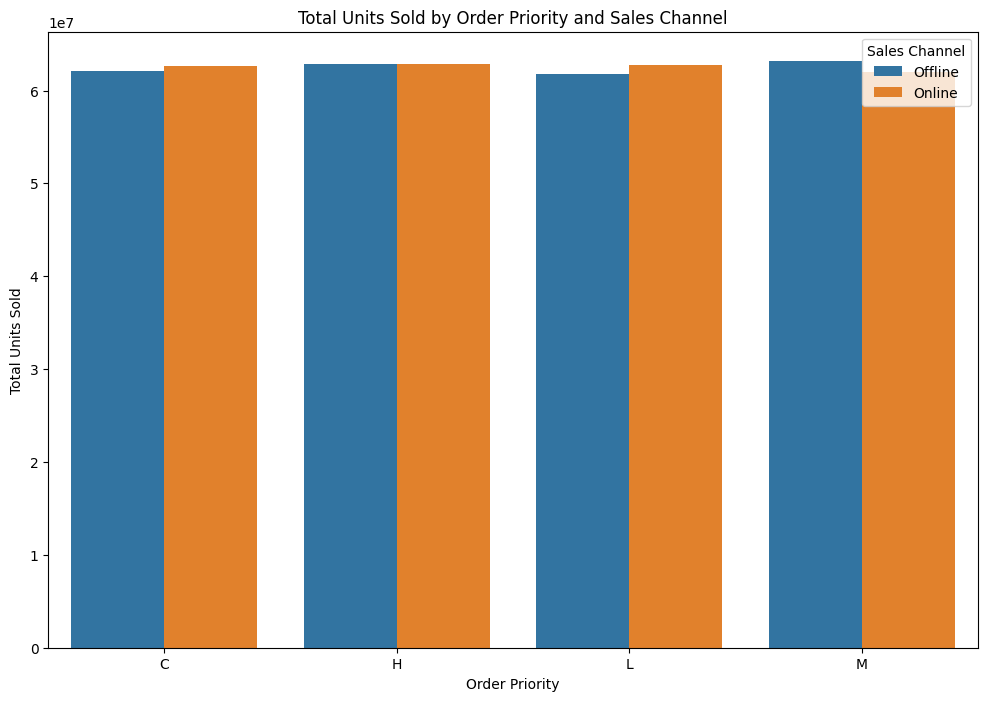

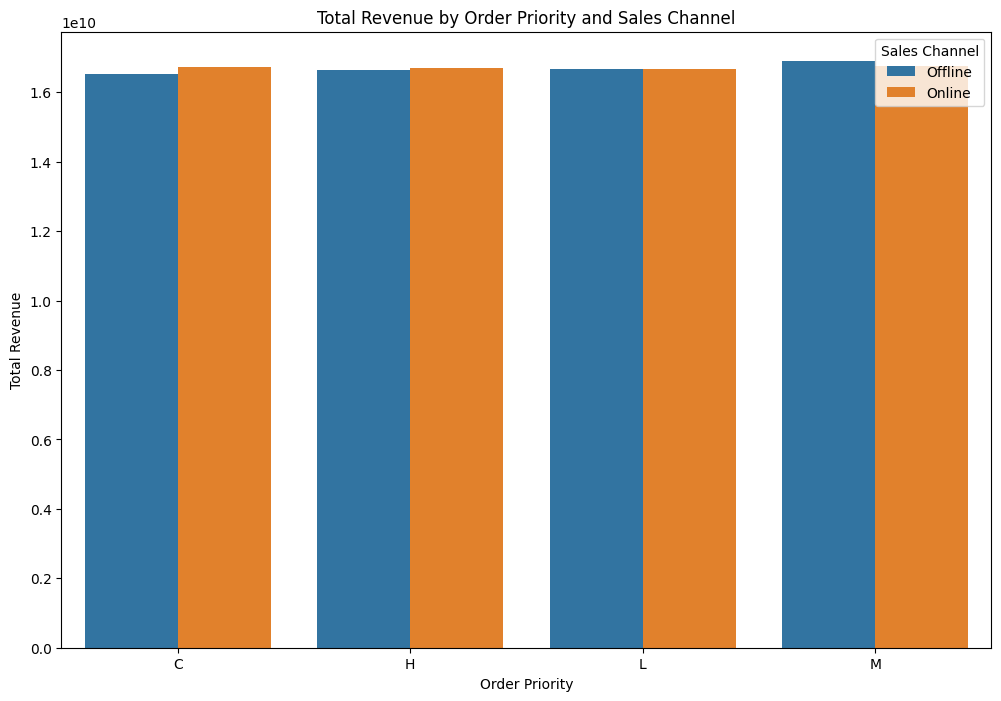

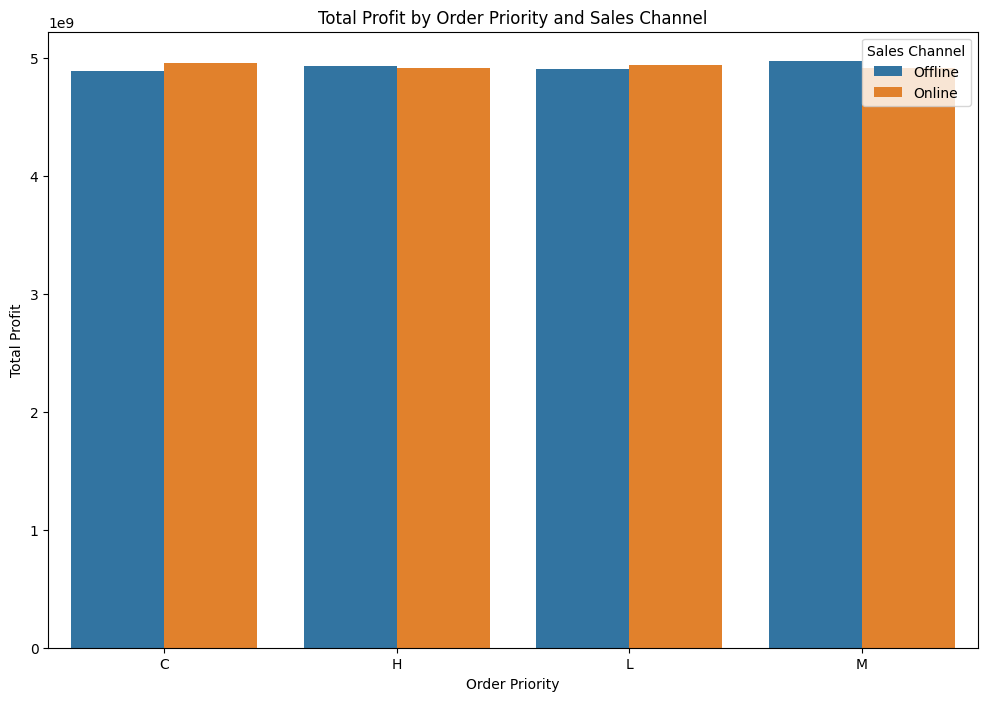

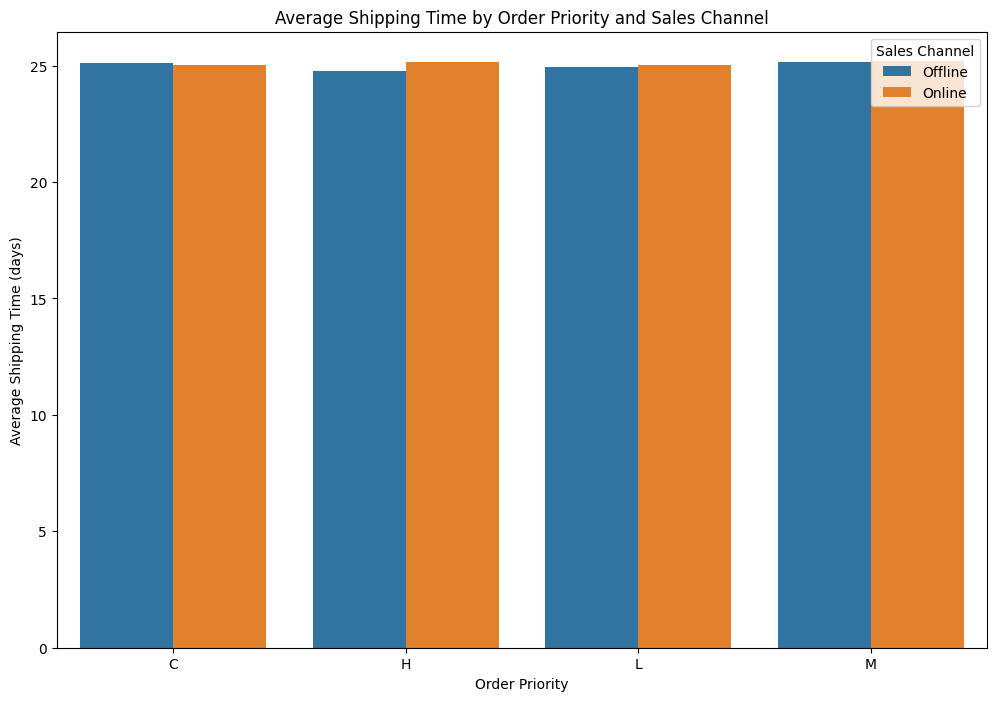

  Sales Channel Order Priority  Units Sold  Total Revenue  Total Profit  \
0       Offline              C    62070435   1.651791e+10  4.883048e+09   
1       Offline              H    62888532   1.665549e+10  4.932194e+09   
2       Offline              L    61741004   1.667574e+10  4.906661e+09   
3       Offline              M    63171201   1.690119e+10  4.970097e+09   
4        Online              C    62606910   1.673645e+10  4.951311e+09   
5        Online              H    62833684   1.669261e+10  4.914985e+09   
6        Online              L    62790722   1.667649e+10  4.938647e+09   
7        Online              M    62042129   1.675080e+10  4.912181e+09   

   Shipping Time  
0      25.102163  
1      24.760164  
2      24.929221  
3      25.139154  
4      25.006736  
5      25.141735  
6      25.010796  
7      25.195812  


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_channel(data):
    # Group by Sales Channel and Order Priority, then calculate relevant metrics
    priority_metrics = data.groupby(['Sales Channel', 'Order Priority']).agg({
        'Units Sold': 'sum',
        'Total Revenue': 'sum',
        'Total Profit': 'sum',
        'Shipping Time': 'mean'
    }).reset_index()

    # Plotting function for Sales Channel and Order Priority metrics
    def plot_metrics(metric, title, ylabel):
        plt.figure(figsize=(12, 8))
        sns.barplot(data=priority_metrics, x='Order Priority', y=metric, hue='Sales Channel')
        plt.title(title)
        plt.xlabel('Order Priority')
        plt.ylabel(ylabel)
        plt.legend(title='Sales Channel')
        plt.show()

    # Plot the total units sold by order priority and sales channel
    plot_metrics('Units Sold', 'Total Units Sold by Order Priority and Sales Channel', 'Total Units Sold')

    # Plot the total revenue by order priority and sales channel
    plot_metrics('Total Revenue', 'Total Revenue by Order Priority and Sales Channel', 'Total Revenue')

    # Plot the total profit by order priority and sales channel
    plot_metrics('Total Profit', 'Total Profit by Order Priority and Sales Channel', 'Total Profit')

    # Plot the average shipping time by order priority and sales channel
    plot_metrics('Shipping Time', 'Average Shipping Time by Order Priority and Sales Channel', 'Average Shipping Time (days)')

    # Performance comparison summary
    print(priority_metrics)
plot_sales_channel(data)

Sales Channel + Item Type

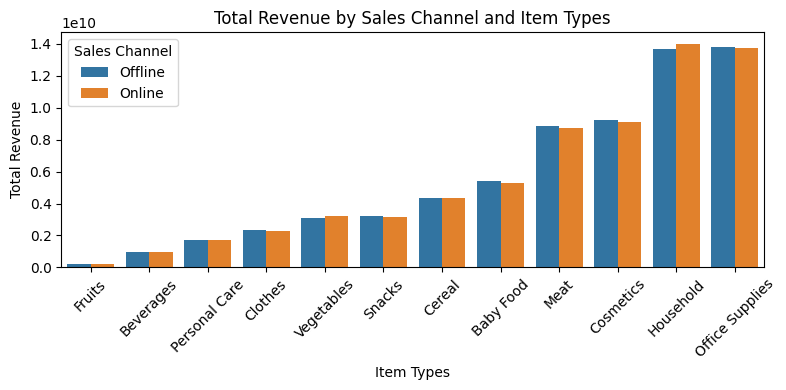

In [102]:
# Assuming your dataset is named 'df'
total_revenue_item = df.groupby(['Item Type', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
total_revenue_item = total_revenue_item.sort_values(by='Total Revenue')

# Visualize the units sold based on region and item type
plt.figure(figsize=(8, 4))
sns.barplot(x='Item Type', y='Total Revenue', hue='Sales Channel', data=total_revenue_item)
plt.title('Total Revenue by Sales Channel and Item Types')
plt.xlabel('Item Types')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Sales Channel + Region

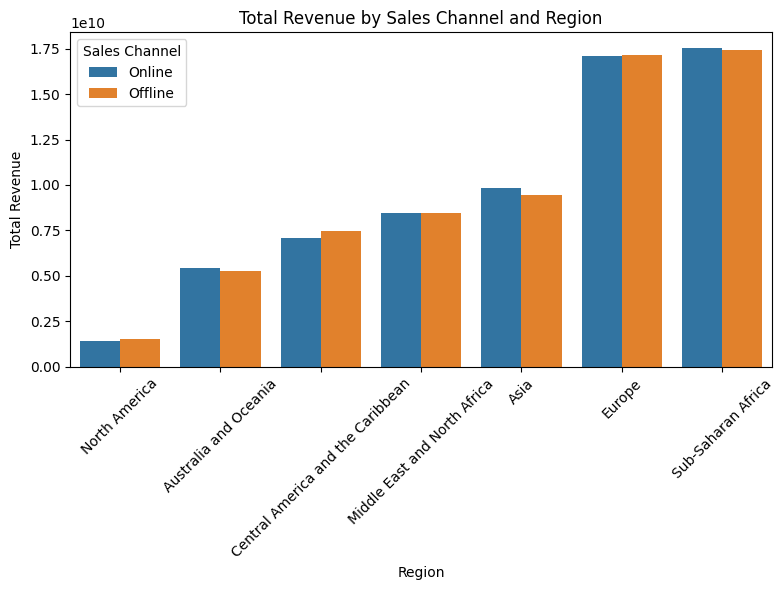

In [103]:
# Assuming your dataset is named 'df'
total_revenue_region = df.groupby(['Region', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
total_revenue_region = total_revenue_region.sort_values(by='Total Revenue')

# Visualize the units sold based on region and item type
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Total Revenue', hue='Sales Channel', data=total_revenue_region)
plt.title('Total Revenue by Sales Channel and Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Sales Channel + Region + Item Type

In online channel

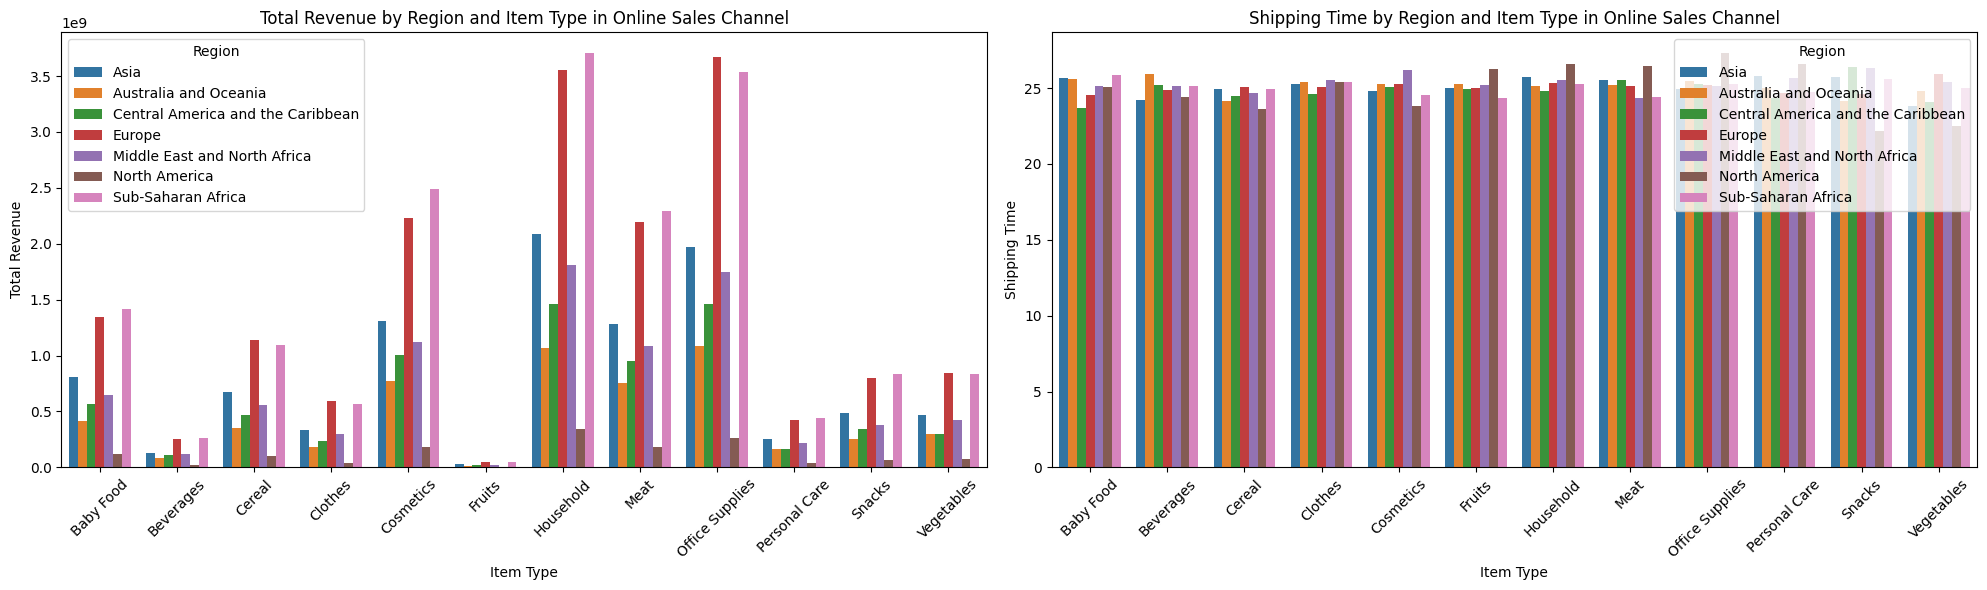

In [104]:
#sales channel and item type
sales_metrics = data.groupby(['Region', 'Item Type', 'Sales Channel']).agg({
        'Units Sold': 'sum',
        'Total Revenue': 'sum',
        'Total Profit': 'sum',
        'Shipping Time': 'mean'
    }).reset_index()
online_channel = sales_metrics[sales_metrics['Sales Channel'] == 'Online']
offline_channel = sales_metrics[sales_metrics['Sales Channel'] == 'Offline']

# Define the data frame
df = online_channel

# Create a figure with 2 subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Visualize the total revenue based on region and item type in the online sales channel
sns.barplot(ax=axes[0], x='Item Type', y='Total Revenue', hue='Region', data=df)
axes[0].set_title('Total Revenue by Region and Item Type in Online Sales Channel')
axes[0].set_xlabel('Item Type')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Region')

# Visualize the shipping time based on region and item type in the online sales channel
sns.barplot(ax=axes[1], x='Item Type', y='Shipping Time', hue='Region', data=df)
axes[1].set_title('Shipping Time by Region and Item Type in Online Sales Channel')
axes[1].set_xlabel('Item Type')
axes[1].set_ylabel('Shipping Time')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Region')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


IN offline Channel

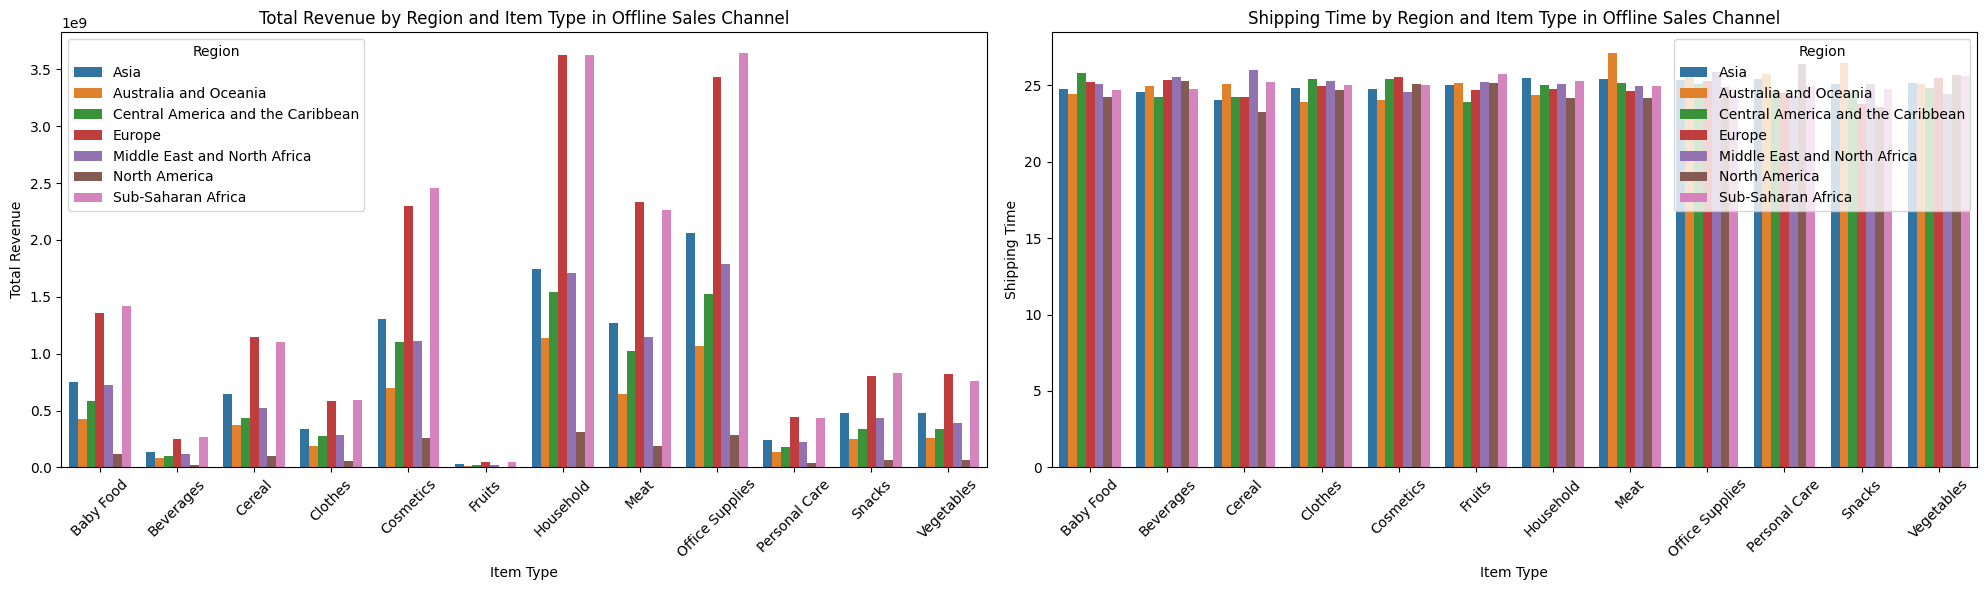

In [105]:
# Define the data frame
df = offline_channel

# Create a figure with 2 subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Visualize the total revenue based on region and item type in the online sales channel
sns.barplot(ax=axes[0], x='Item Type', y='Total Revenue', hue='Region', data=df)
axes[0].set_title('Total Revenue by Region and Item Type in Offline Sales Channel')
axes[0].set_xlabel('Item Type')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Region')

# Visualize the shipping time based on region and item type in the online sales channel
sns.barplot(ax=axes[1], x='Item Type', y='Shipping Time', hue='Region', data=df)
axes[1].set_title('Shipping Time by Region and Item Type in Offline Sales Channel')
axes[1].set_xlabel('Item Type')
axes[1].set_ylabel('Shipping Time')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Region')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


# 5. Order Date & Ship Date

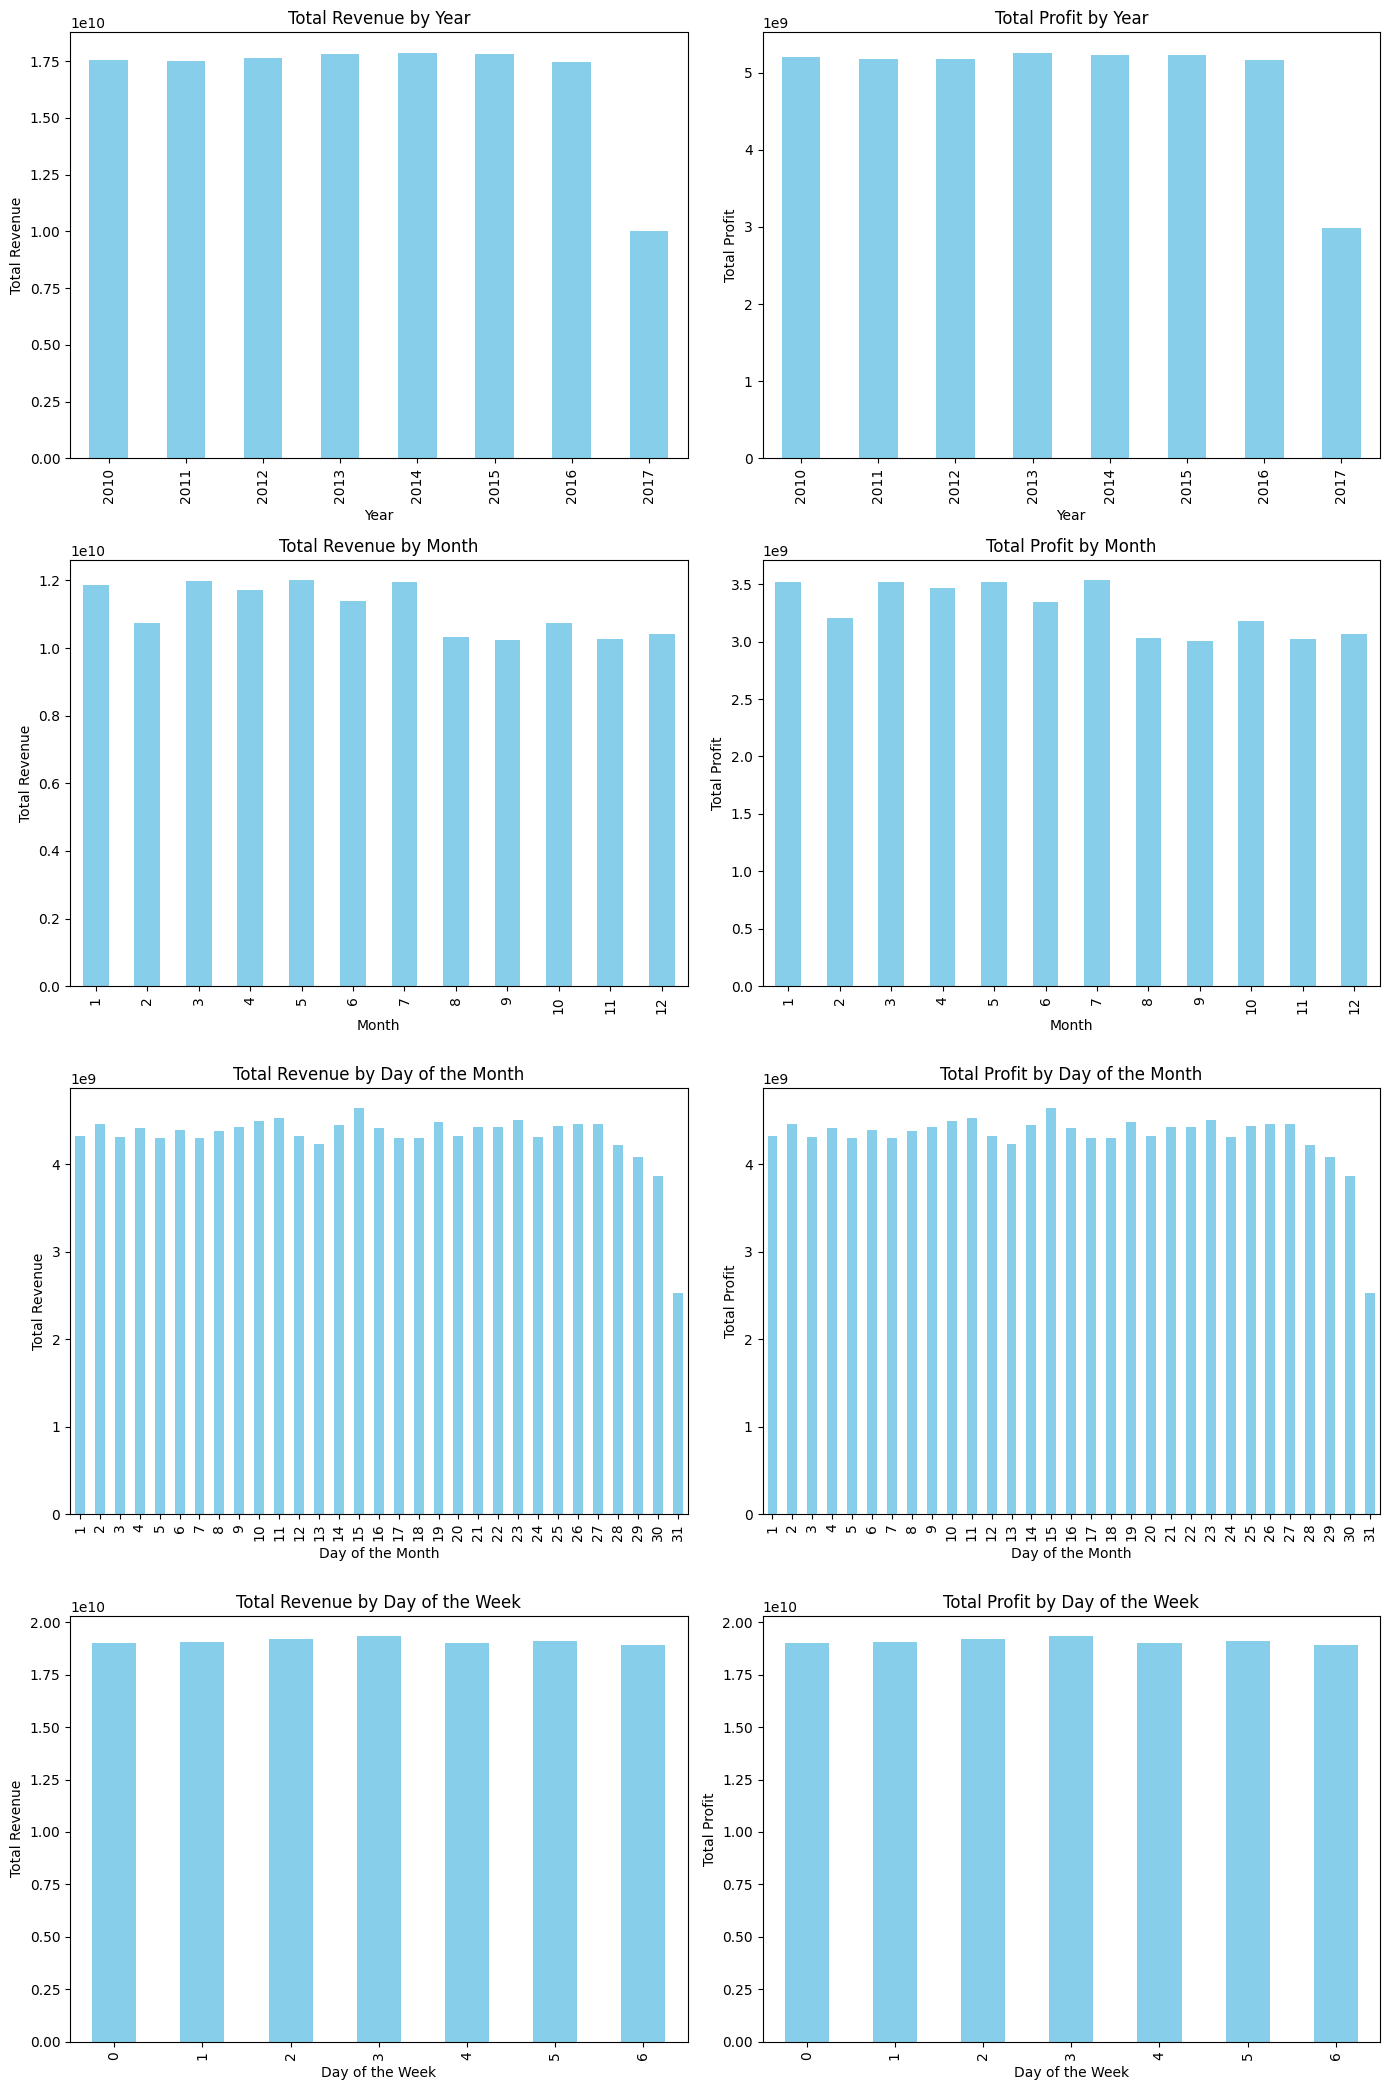

In [106]:
# Extracting year, month, and day of the week from the order date
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

# Grouping data by year, month, day of the month, and day of the week
yearly_revenue = data.groupby('Order Year')['Total Revenue'].sum()
yearly_profit = data.groupby('Order Year')['Total Profit'].sum()
monthly_revenue = data.groupby('Order Month')['Total Revenue'].sum()
monthly_profit = data.groupby('Order Month')['Total Profit'].sum()
day_of_month_revenue = data.groupby('Order Day')['Total Revenue'].sum()
day_of_month_profit = data.groupby('Order Day')['Total Profit'].sum()
day_of_week_revenue = data.groupby('Order Day of Week')['Total Revenue'].sum()
day_of_week_profit = data.groupby('Order Day of Week')['Total Profit'].sum()

# Creating the figure with 6 subplots (3x2)
fig, axes = plt.subplots(4, 2, figsize=(14, 21))

# Plotting total revenue by year
yearly_revenue.plot(kind='bar', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Total Revenue by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Revenue')

# Plotting total profit by year
yearly_profit.plot(kind='bar', color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Total Profit by Year')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total Profit')

# Plotting total revenue by month
monthly_revenue.plot(kind='bar', color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Total Revenue by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Total Revenue')

# Plotting total profit by month
monthly_profit.plot(kind='bar', color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Total Profit by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Total Profit')

# Plotting total revenue by day of the month
day_of_month_revenue.plot(kind='bar', color='skyblue', ax=axes[2, 0])
axes[2, 0].set_title('Total Revenue by Day of the Month')
axes[2, 0].set_xlabel('Day of the Month')
axes[2, 0].set_ylabel('Total Revenue')

# Plotting total profit by day of the month
day_of_month_revenue.plot(kind='bar', color='skyblue', ax=axes[2, 1])
axes[2, 1].set_title('Total Profit by Day of the Month')
axes[2, 1].set_xlabel('Day of the Month')
axes[2, 1].set_ylabel('Total Profit')

# Plotting total revenue by day of the week
day_of_week_revenue.plot(kind='bar', color='skyblue', ax=axes[3, 0])
axes[3, 0].set_title('Total Revenue by Day of the Week')
axes[3, 0].set_xlabel('Day of the Week')
axes[3, 0].set_ylabel('Total Revenue')

# Plotting total profit by day of the week
day_of_week_revenue.plot(kind='bar', color='skyblue', ax=axes[3, 1])
axes[3, 1].set_title('Total Profit by Day of the Week')
axes[3, 1].set_xlabel('Day of the Week')
axes[3, 1].set_ylabel('Total Profit')

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Showing the plot
plt.show()


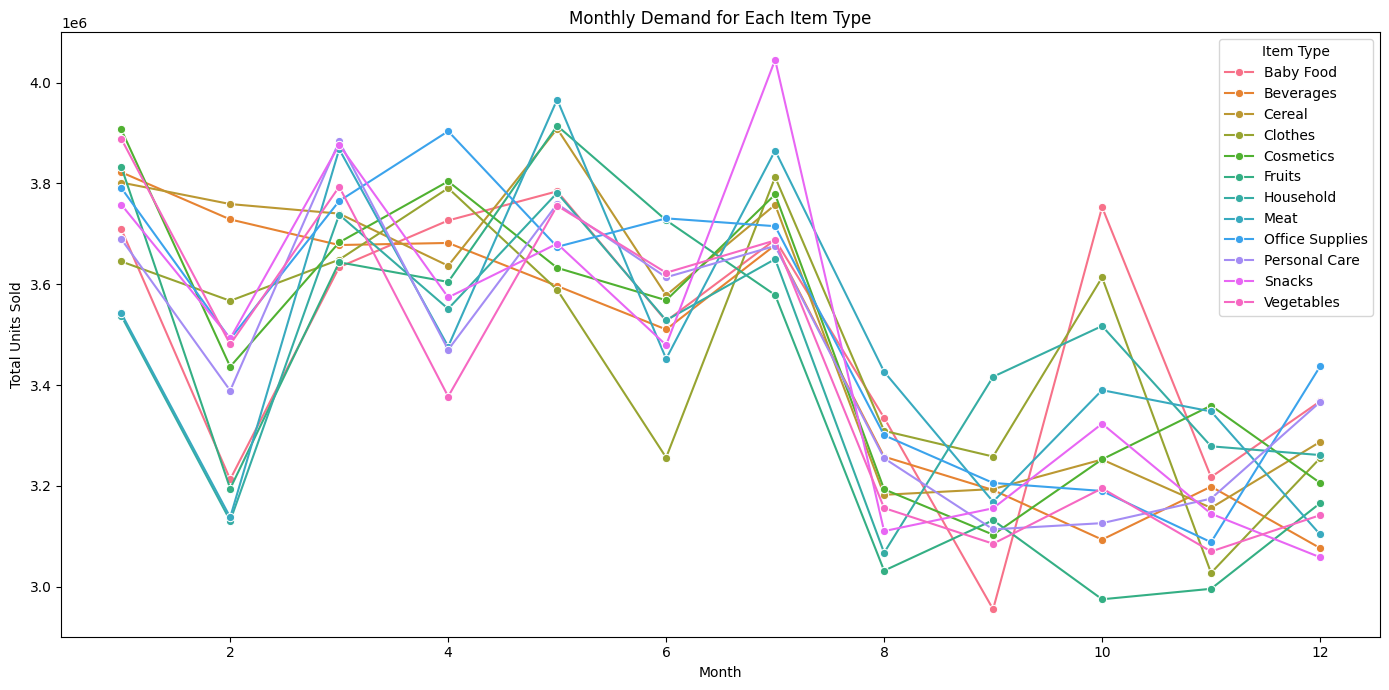

In [107]:
# Extracting month from the order date
data['Order Month'] = data['Order Date'].dt.month

# Grouping data by month and item type, aggregating total units sold
monthly_demand = data.groupby(['Order Month', 'Item Type'])['Units Sold'].sum().reset_index()

# Creating the figure with a subplot
plt.figure(figsize=(14, 7))

# Plotting the monthly demand for each item type
sns.lineplot(x='Order Month', y='Units Sold', hue='Item Type', data=monthly_demand, marker='o')

# Adding titles and labels
plt.title('Monthly Demand for Each Item Type')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.legend(title='Item Type')

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

<ipython-input-108-fe0da588d309>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-108-fe0da588d309>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




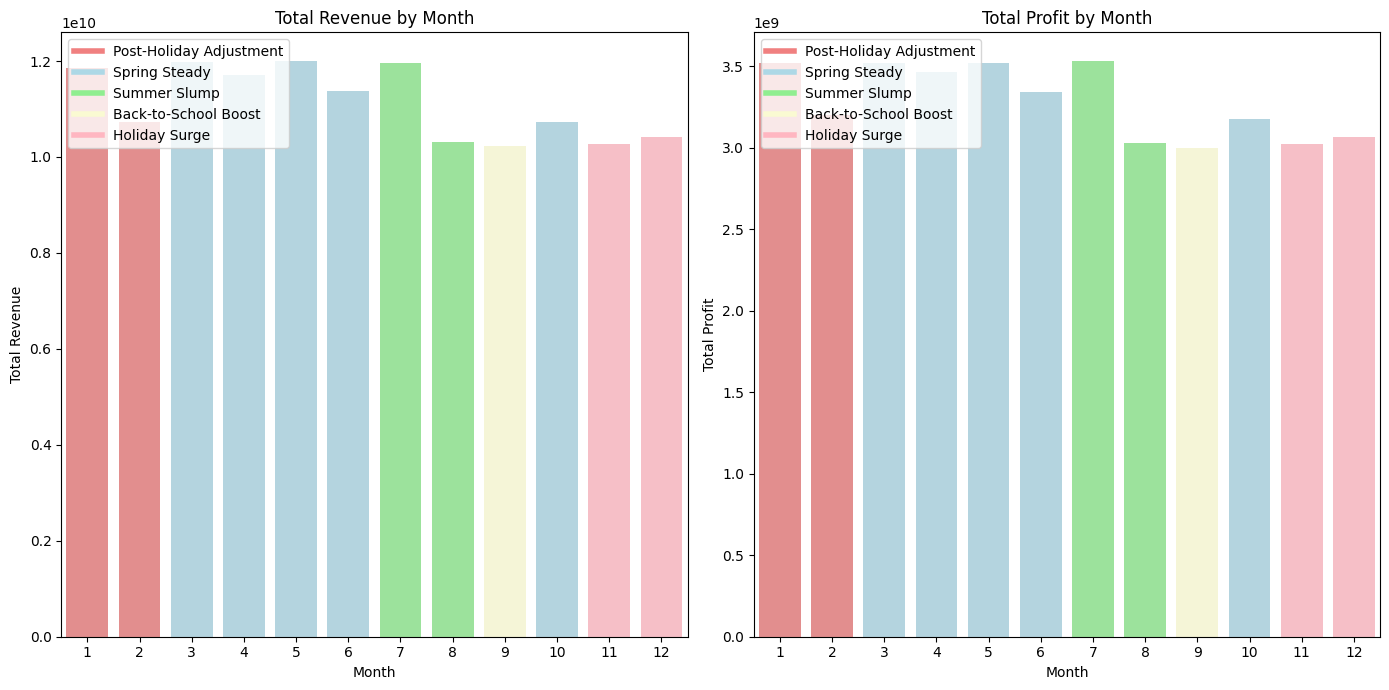

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting month from the order date
data['Order Month'] = data['Order Date'].dt.month

# Grouping data by month and item type, aggregating total units sold
monthly_revenue = data.groupby('Order Month')['Total Revenue'].sum().reset_index()
monthly_profit = data.groupby('Order Month')['Total Profit'].sum().reset_index()

# Define colors for each month based on trends
month_colors = ['lightcoral'] * 2 + ['lightblue'] * 4 + ['lightgreen'] * 2 + ['lightgoldenrodyellow'] * 1 + ['lightblue'] * 1 + ['lightpink'] * 2

# Creating the figure with 2 subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plotting total revenue by month with custom colors
sns.barplot(x='Order Month', y='Total Revenue', data=monthly_revenue, palette=month_colors, ax=axes[0])
axes[0].set_title('Total Revenue by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Revenue')

# Plotting total profit by month with custom colors
sns.barplot(x='Order Month', y='Total Profit', data=monthly_profit, palette=month_colors, ax=axes[1])
axes[1].set_title('Total Profit by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Profit')

# Adding custom legend
handles = [
    plt.Line2D([0], [0], color='lightcoral', lw=4, label='Post-Holiday Adjustment'),
    plt.Line2D([0], [0], color='lightblue', lw=4, label='Spring Steady'),
    plt.Line2D([0], [0], color='lightgreen', lw=4, label='Summer Slump'),
    plt.Line2D([0], [0], color='lightgoldenrodyellow', lw=4, label='Back-to-School Boost'),
    plt.Line2D([0], [0], color='lightpink', lw=4, label='Holiday Surge')
]
axes[0].legend(handles=handles, loc='upper left')
axes[1].legend(handles=handles, loc='upper left')

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Showing the plot
plt.show()


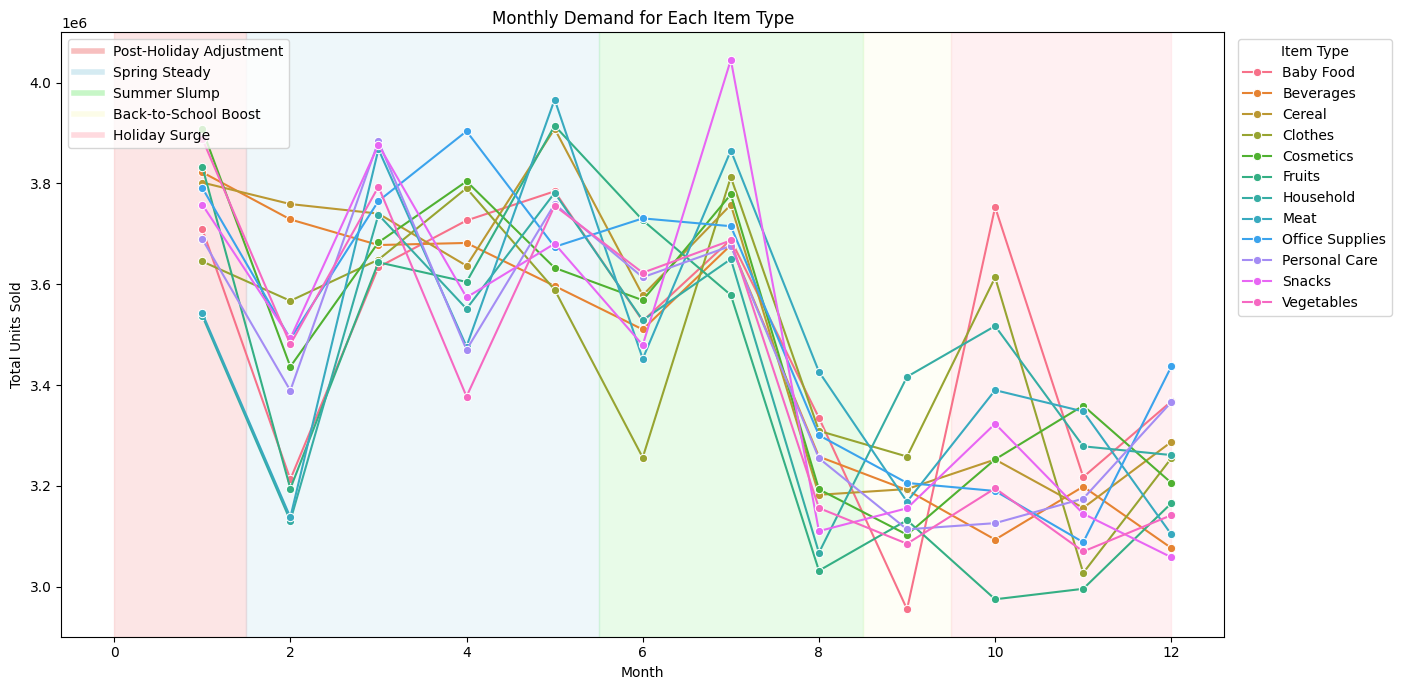

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting month from the order date
data['Order Month'] = data['Order Date'].dt.month

# Grouping data by month and item type, aggregating total units sold
monthly_demand = data.groupby(['Order Month', 'Item Type'])['Units Sold'].sum().reset_index()

# Creating the figure with a subplot
plt.figure(figsize=(14, 7))

# Plotting the monthly demand for each item type
sns.lineplot(x='Order Month', y='Units Sold', hue='Item Type', data=monthly_demand, marker='o')

# Adding shaded areas to highlight seasonal trends
plt.axvspan(0, 1.5, color='lightcoral', alpha=0.2)
plt.axvspan(1.5, 5.5, color='lightblue', alpha=0.2)
plt.axvspan(5.5, 8.5, color='lightgreen', alpha=0.2)
plt.axvspan(8.5, 9.5, color='lightgoldenrodyellow', alpha=0.2)
plt.axvspan(9.5, 12, color='lightpink', alpha=0.2)

# Adding titles and labels
plt.title('Monthly Demand for Each Item Type')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')

# Adding custom legend for trends
custom_lines = [
    plt.Line2D([0], [0], color='lightcoral', lw=4, alpha=0.5),
    plt.Line2D([0], [0], color='lightblue', lw=4, alpha=0.5),
    plt.Line2D([0], [0], color='lightgreen', lw=4, alpha=0.5),
    plt.Line2D([0], [0], color='lightgoldenrodyellow', lw=4, alpha=0.5),
    plt.Line2D([0], [0], color='lightpink', lw=4, alpha=0.5)
]
first_legend = plt.legend(custom_lines, ['Post-Holiday Adjustment', 'Spring Steady', 'Summer Slump', 'Back-to-School Boost', 'Holiday Surge'], loc='upper left')
plt.gca().add_artist(first_legend)  # Add the first legend manually

# Adding legend for item types
second_legend = plt.legend(title='Item Type', loc='upper right', bbox_to_anchor=(1.15, 1))

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

# Checking how the price changes monthly in each country

In [133]:
check = data.groupby(['Country', 'Item Type', 'Order Month', 'Order Year']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum'
}).reset_index()
check

Country   Item Type  Order Month  Order Year  Units Sold  \
0      Afghanistan   Baby Food            1        2010       15711   
1      Afghanistan   Baby Food            2        2011        7642   
2      Afghanistan   Baby Food            2        2013        3272   
3      Afghanistan   Baby Food            2        2015          69   
4      Afghanistan   Baby Food            2        2017         884   
...            ...         ...          ...         ...         ...   
76636     Zimbabwe  Vegetables           12        2010        5604   
76637     Zimbabwe  Vegetables           12        2012        9616   
76638     Zimbabwe  Vegetables           12        2013        9517   
76639     Zimbabwe  Vegetables           12        2014        5136   
76640     Zimbabwe  Vegetables           12        2015        7600   

       Total Revenue  
0         4010704.08  
1         1950849.76  
2          835276.16  
3           17614.32  
4          225667.52  
...              ...  
76636      863352.24  
76637     1481440.96  
76638     1466189.02  
76639      791252.16  
76640     1170856.00  

[76641 rows x 6 columns]

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot monthly change and monthly demand side by side
def plot_monthly_change_country(data, country, year):
    # Filter data for the specified country and year
    df = data[(data['Order Year'] == year) & (data['Country'] == country)].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Group by month and calculate total revenue
    monthly_revenue = df.groupby('Order Month')['Total Revenue'].sum().reset_index()
    monthly_revenue['Monthly Change'] = monthly_revenue['Total Revenue'].diff()

    # Grouping data by month and item type, aggregating total units sold
    monthly_demand = df.groupby(['Order Month', 'Item Type'])['Units Sold'].sum().reset_index()

    # Creating the figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Plotting the total revenue and monthly change
    axes[0].plot(monthly_revenue['Order Month'], monthly_revenue['Total Revenue'], marker='o', label='Total Revenue')
    axes[0].plot(monthly_revenue['Order Month'], monthly_revenue['Monthly Change'], marker='o', linestyle='--', label='Monthly Change')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Revenue')
    axes[0].set_title(f'Monthly Total Revenue and Change in Revenue for {country} in {year}')
    axes[0].legend()
    axes[0].grid(True)

    # Plotting the monthly demand for each item type
    sns.lineplot(ax=axes[1], x='Order Month', y='Units Sold', hue='Item Type', data=monthly_demand, marker='o')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Units Sold')
    axes[1].set_title(f'Monthly Demand for Each Item Type in {country} in {year}')
    axes[1].legend(title='Item Type')
    axes[1].grid(True)

    # Adjusting layout to prevent overlapping
    plt.tight_layout()

    # Showing the plots
    plt.show()

# Example usage:
# Ensure your 'data' DataFrame includes 'Order Year', 'Order Month', 'Country', 'Total Revenue', 'Units Sold', and 'Item Type' columns


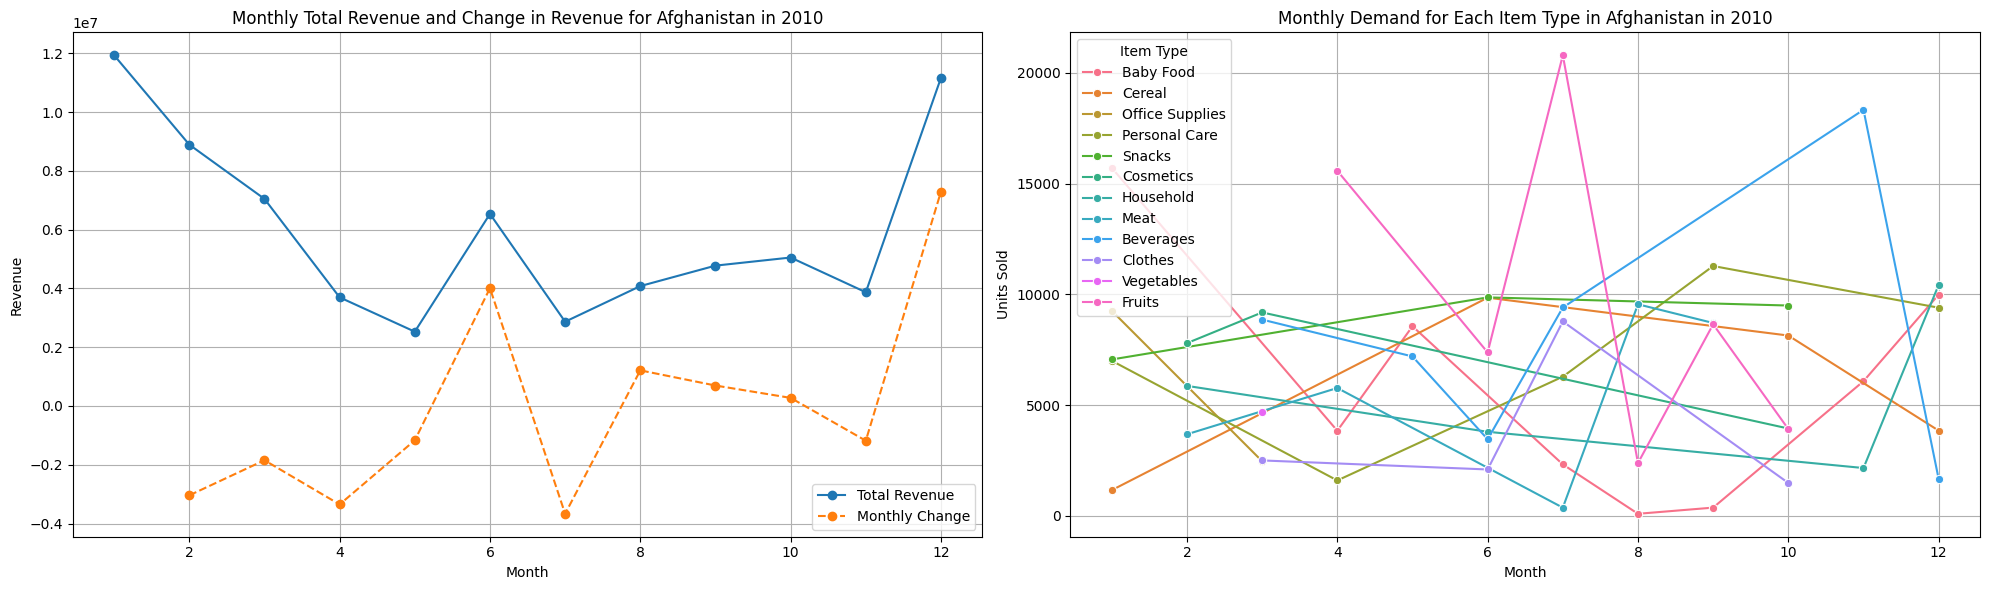

In [135]:
plot_monthly_change_country(data, 'Afghanistan', 2010)

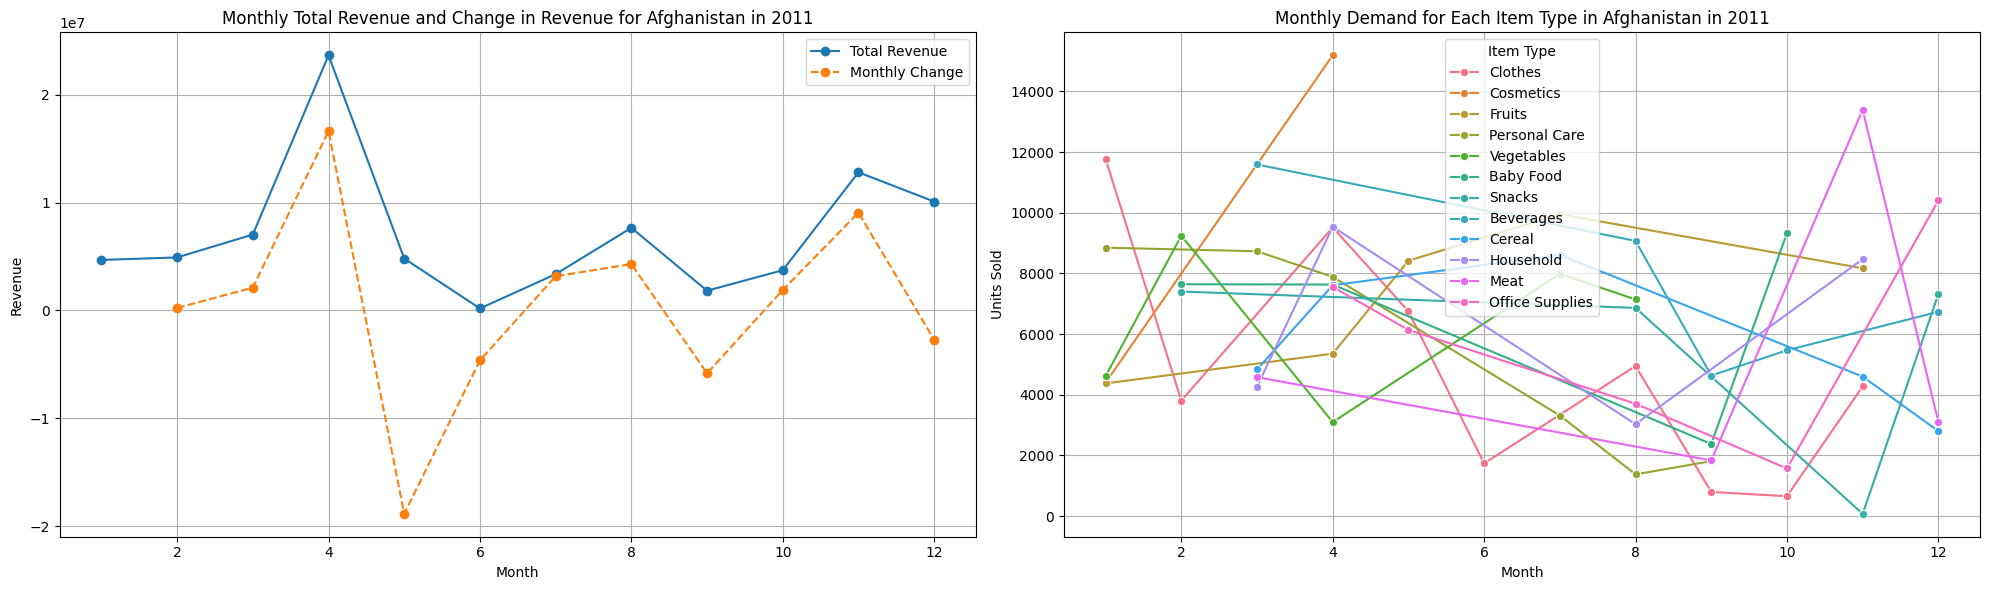

In [136]:
plot_monthly_change_country(check, 'Afghanistan', 2011)

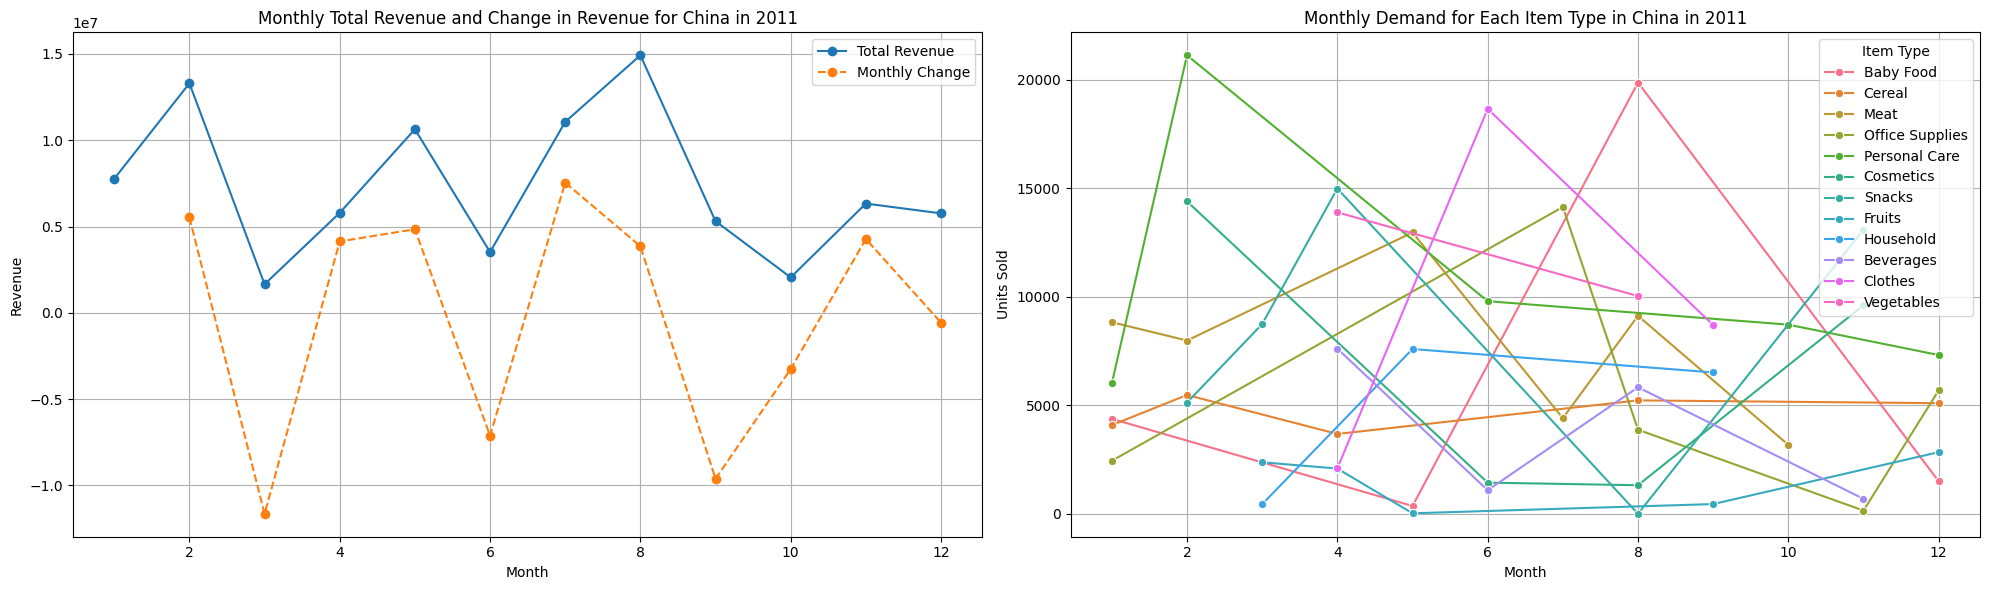

In [137]:
plot_monthly_change_country(check, 'China', 2011)

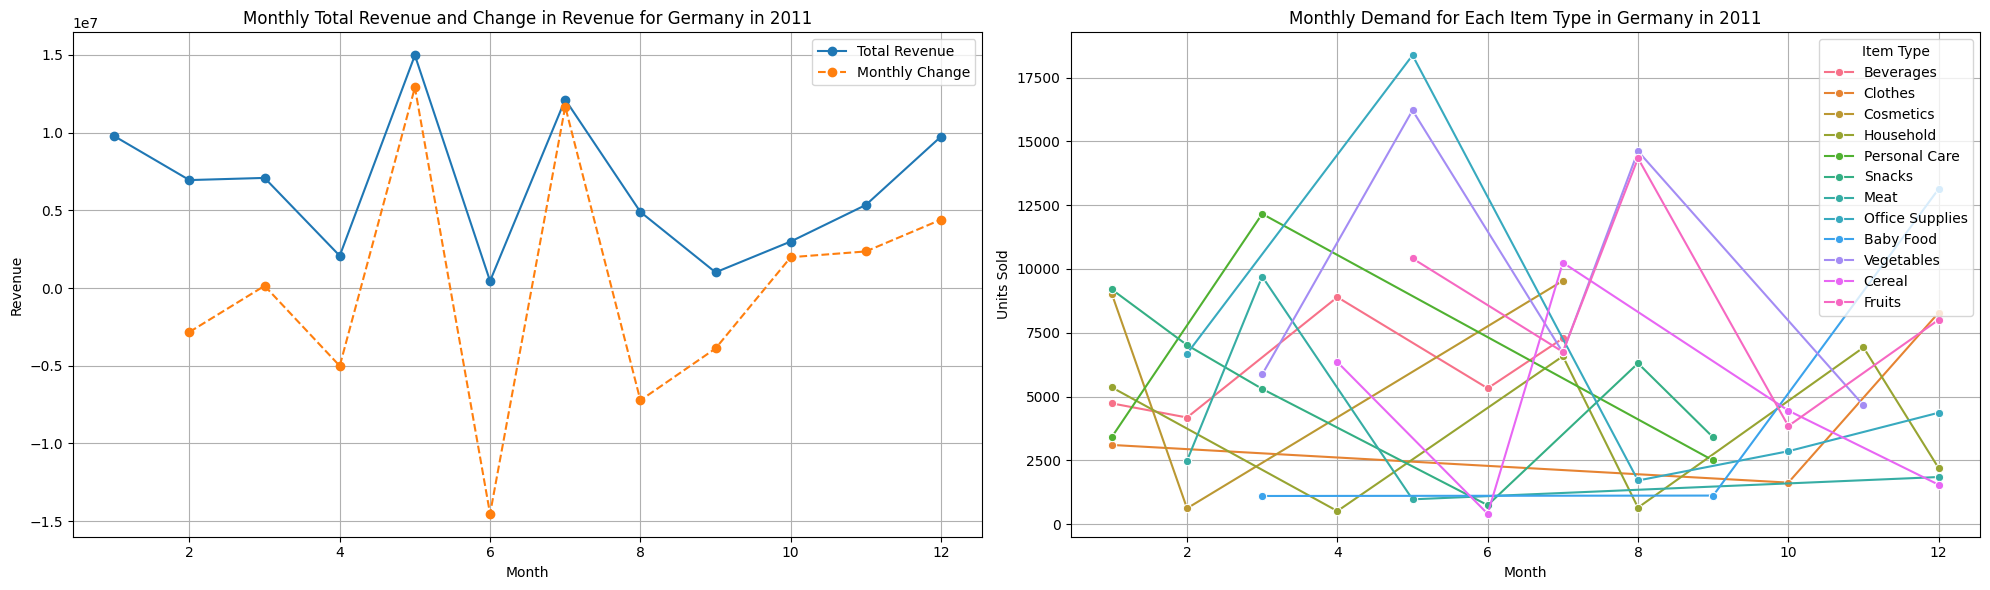

In [138]:
plot_monthly_change_country(check, 'Germany', 2011)

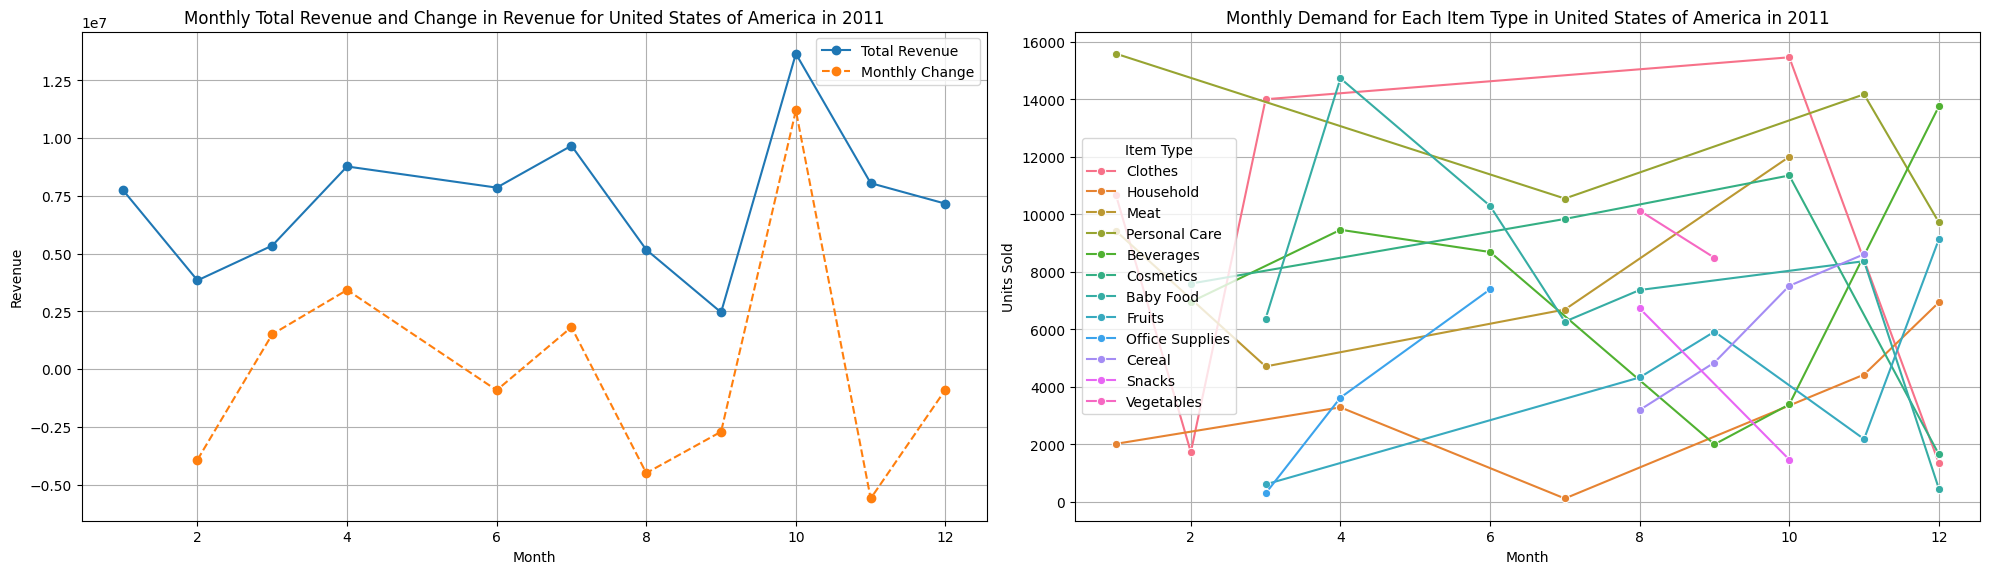

In [156]:
plot_monthly_change_country(check, 'United States of America', 2011)

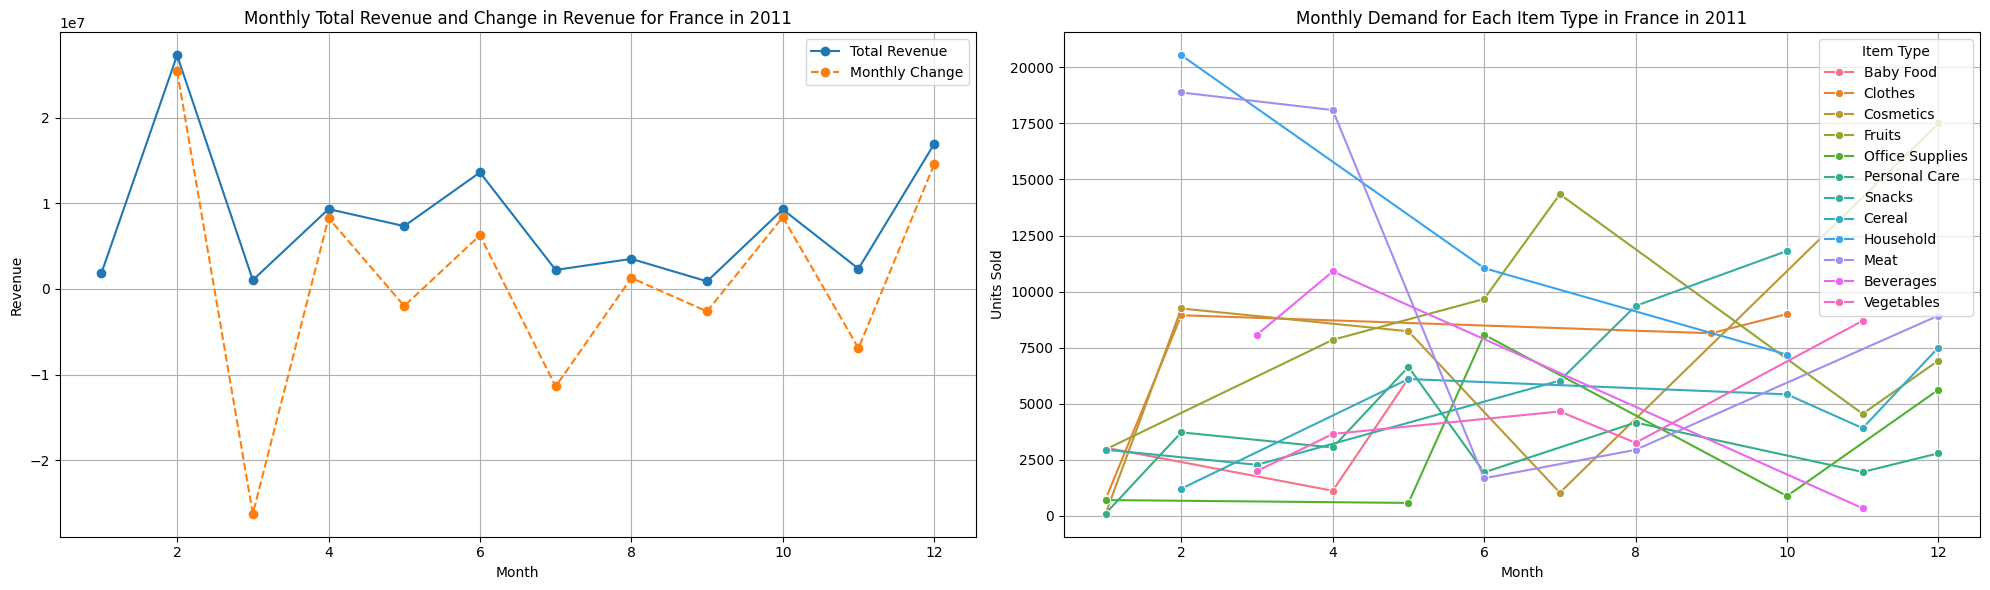

In [157]:
plot_monthly_change_country(check, 'France', 2011)

# Checking Correlation

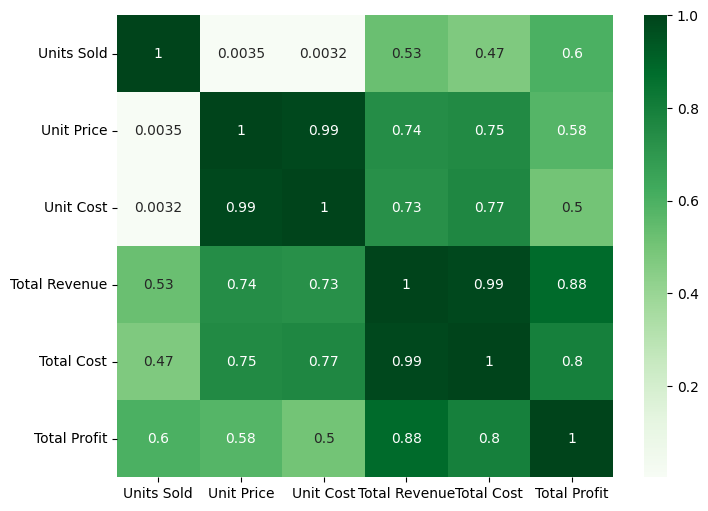

In [47]:
# Tính toán ma trận tương quan
df = data
corr_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Greens')
plt.show()

#Checking Stationary


In [48]:
df_time_series = data[['Order Date', 'Total Revenue']]
df_time_series = df_time_series.sort_values(by = 'Order Date')
df_time_series = df_time_series.groupby(by = 'Order Date')['Total Revenue'].sum().reset_index()
df_time_series = df_time_series.set_index('Order Date')
df_time_series

Total Revenue
Order Date               
2010-01-01    47119220.30
2010-01-02    38397582.10
2010-01-03    65138561.36
2010-01-04    70553636.16
2010-01-05    48762396.14
...                   ...
2017-07-24    53949237.29
2017-07-25    43917353.04
2017-07-26    58720600.44
2017-07-27    60150661.40
2017-07-28    44179947.55

[2766 rows x 1 columns]

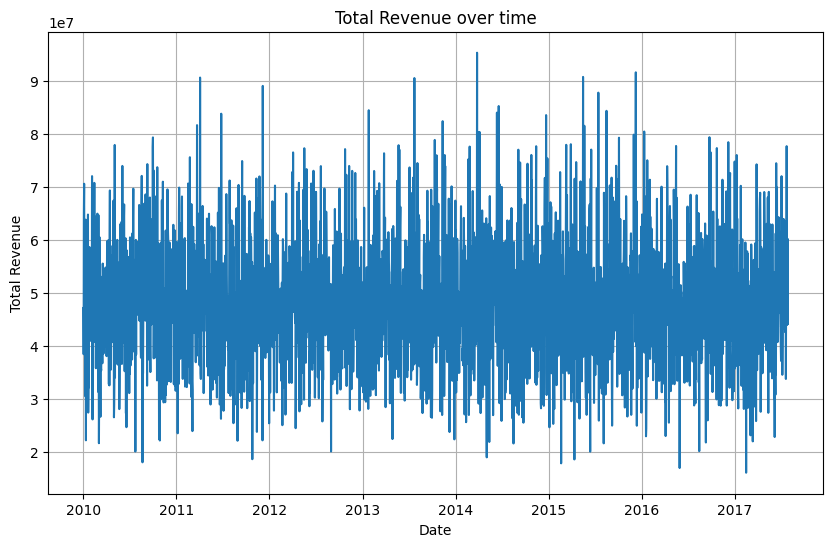

In [49]:
#plot close price in train data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.plot(df_time_series['Total Revenue'])
plt.title('Total Revenue over time')
plt.show()

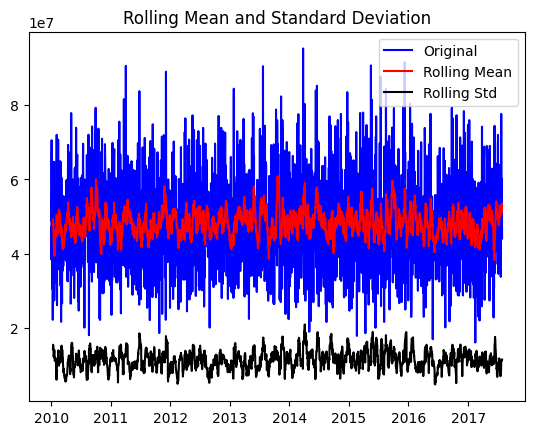

Results of dickey fuller test
Test Statistics                 -22.024469
p-value                           0.000000
No. of lags used                  5.000000
Number of observations used    2760.000000
critical value (1%)              -3.432722
critical value (5%)              -2.862588
critical value (10%)             -2.567328
dtype: float64


In [50]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_time_series)

Test Statistic vs. Critical Values: The test statistic (-22.024469) is much lower than the critical values at all levels (1%, 5%, and 10%). This means that the test statistic falls in the region where we reject the null hypothesis of a unit root.
p-value: A p-value of 0.000000 indicates strong evidence against the null hypothesis of a unit root.

Conclusion:
Since the test statistic is significantly lower than the critical values and the p-value is extremely low, we reject the null hypothesis. This means that the time series is stationary.

Therefore, based on the results of the Dickey-Fuller test, the time series is stationary.